# Alternus Vera 

 

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Sentiment Analysis 
- **Feature 2 :** LDA Topic Modelling
- **Feature 3 :** Sensationalism 
- **Feature 4 :** Political Affiliation 
- **Feature 5 :** Clickbait 
- **Feature 6 :** Spam 
- **Feature 7 :** Author Credibility 
- **Feature 8 :** Source Reputation
- **Feature 9 :** Content Length     
- **Feature 10 :** Word Frequency 
- Vector Classification Modeling 
- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection
**List top Features Selected based on research articles**



### Team Contributions example:

|Features  |  Member |
|-----|-----|
| Confirmation Bias                        |  Pooja Agarwal |  
| Echo Chamber                 |  Rohini Shimpatwar | 
| Content Statistics                 |  Abhishek Prabhudesai |   
| TitleVSBody                           |  Saurabh Aggarwal |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 


#### What did I try and What worked? 

> 1. Confirmation Bias causes one to believe what they already think to be true and disprove rest. The approach to fidn out if the data(reviews/text/view/post) we have is biased, need to do some outlier analysis and then std deviation from the most part of the data tells us how much is the variation in the view. Such content can be regrarded as biased. Here, we are working on the BS Detector data which they already have labelled as bias and some others.  Assuming this bias to be confirmation bias, doing some NLP on the text and preparing a classification model for ""biased"" and ""dont know"" classes. 
2. Content Statistics- There are various measures of content statistics like length of text, Number of POS, number of sentences, Sentiment  of the text etc. Various content statistics are derived using various distillation methods & classification model is applied on the top.                                                      3. EchoChamber  - From the document score is found, which helps to find out if the news document has created an echochamber or not. Have used techniques likes Distillation, Topic Modelling,LDA ,LSA , Cosine similarity      
4. Title Vs Body : Deep Learning Neural Networks with MLP layers. The strategy is to find wether the title and body are connected with each other. For this four classes being used [related, unrelated, agree or discuss].  First the TF-IDF vectorization for the body and title of the articles are computed and then from the vectors Cosine Similarity is computed. Using the Train and test pipelines it is trained on Multi perceptron Neural Network with Softmax Activation function. After this, compute Accuracy and Confusion matrix for all the features. Once we get the accuracy and score, amalgamate it with liar liar dataset's headlines based on label (agree/unrealted) and build a classification model to get accuracy. For this feature best results were produced with using only MLP on single dataset.                                                                                                                                                                                                               "

#### What did not work?

> 1. Doing train test split  first and then Cleaning the data made my dataset unbalanced.


#### What alternatives did you try?

> 1. Cleaning the data first and then doing train test split

----

### Reading the Data

In [0]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, and 


test_filename = '/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/test.tsv'
train_filename = '/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/train.tsv'
valid_filename = '/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

In [0]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

###  Putting It All Together 

To make the code reusable, we need to create a function that can be called many times.

In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
import time
import nltk
nltk.download('punkt')
nltk.download('wordnet')
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.

Time to clean, tokenize and stem train data: 
 10240 news: 0.13836929400761921 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.013352290789286295 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.013320263226826985 min


### [Google News corpus word2vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)

### Spell Check 

-  You can download the pre-trained model [**here**](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

- Or clone it from GitHub [**GoogleNews-vectors-negative300**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)

> It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

**3 million words * 300 features * 4bytes/feature = ~3.35GB**

> This file consist of the word2vec -  pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

> Look at the [**vocabulory list**](https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary) used to train this model. Each text file contains 100,000 entries from the model. 


>  There are few things that this dataset contains and not. It has stop words like  “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words. 

> It does have numbers but in the form of entried wiht #. e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM”. 

The model used [**WinPython-64bit-2.7.10.3**](https://winpython.github.io/) for efficient python distribution on Windows system. Helps to run the scripts in batches. 

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [0]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

Before: 
 say anni list polit group support third trimest abort demand

Time to spell check the train data: 
 10240 news: 4.607123152414958 min

After: 
 say anni list polit group support third trimmest abort demand


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [0]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1267 news: 0.5208471616109213 min


In [0]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to spell check the valid data: 
 1284 news: 0.5506889939308166 min


##### Saved the trained dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/train_processed.csv", sep=',')
test_news.to_csv("/content/test_processed.csv", sep=',')
valid_news.to_csv("/content/valid_processed.csv", sep=',')

### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

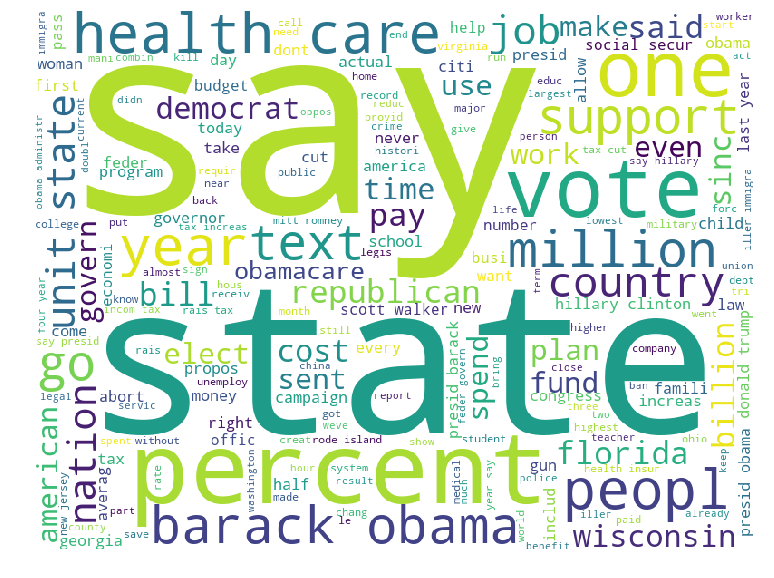

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

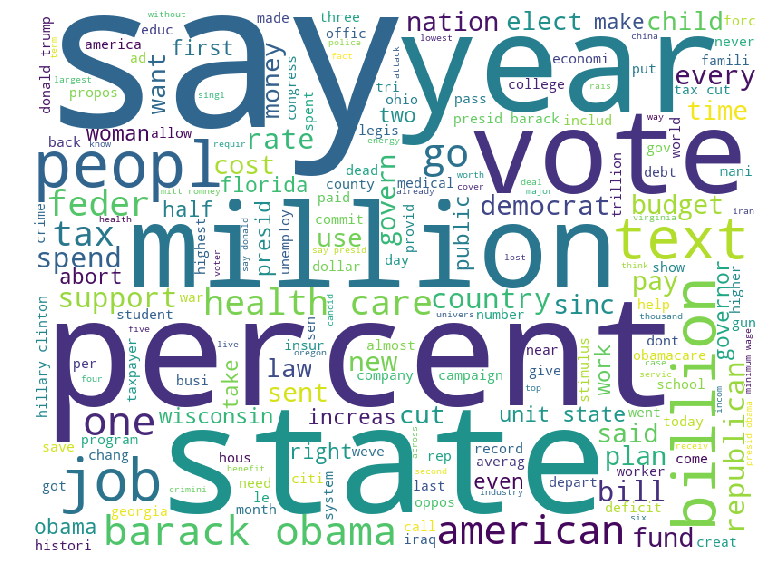

In [0]:
cloud(' '.join(test_news['clean']))

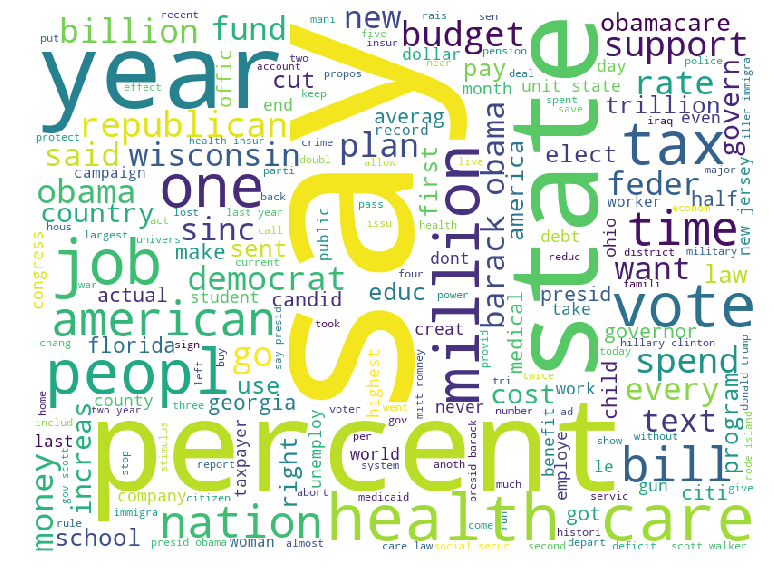

In [0]:
cloud(' '.join(valid_news['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus


# Feature 1: Sentiment analysis 

#### Using Vader Sentiment Analyser

##### [Sentiment Intensity Analyzer](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)


> VADER, or the **Valence Aware Dictionary and sEntiment Reasoner** has created a package that performes sentiment analysis using the polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach

- It is based on lexicons of sentiment-related word.
- The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories.
- The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [0]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')
import nltk
nltk.download('vader_lexicon')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
say anni list polit group support third trimmest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

- senti.polarity_scores is a dictionary
- pos and neg indicates - positive and negative emotions in sentence
- we should be interested in compound score which calculates the final effect

In [0]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

[0, 0.123, 0.656, 0.221, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.645, 0.194, 0.128]
[1, 0.0, 0.438, 0.562, 0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.335, 0.6, 0.065, -0.7506]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.915, 0.0, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.667, 0.333, 0.6124]
[0, 0.32, 0.68, 0.0, -0.5106]
[0, 0.153, 0.657, 0.19, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.522, 0.278, 0.2263]
[0, 0.108, 0.773, 0.119, 0.0516]
[0, 0.198, 0.802, 0.0, -0.4939]
[0, 0.0, 0.625, 0.375, 0.7184]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 0.543, 0.457, 0.6369]
[0, 0.15, 0.429, 0.421, 0.5859]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.507, 0.493, 0.0, -0.802]
[0, 0.0, 0.859, 0.141, 0.2411]
[0, 0.238, 0.495, 0.267, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.588, 0.213, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.184, 0.702, 0.114, -0.2033]
[0, 0.0, 1.0, 0.0, 0.0]


In [0]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [0]:
sentiment = []
vader_pol = []
cmp_score = []

for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.164, 0.469, 0.367, 0.3818]
[0, 0.169, 0.688, 0.143, -0.128]
[0, 0.0, 0.812, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.657, 0.343, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 0.735, 0.265, 0.5574]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.182, 0.579, 0.24, 0.1779]
[0, 0.296, 0.704, 0.0, -

In [0]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280


In [0]:
sentiment = []
vader_pol = []
cmp_score = []

for row in valid_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
valid_news['sentiment_vector'] = sentiment
valid_news['vader_polarity'] = vader_pol
valid_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.87, 0.0, -0.34]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.181, 0.819, 0.0, -0.4767]
[-1, 0.622, 0.378, 0.0, -0.93]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.17, 0.609, 0.222, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.162, 0.838, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.211, 0.789, 0.0, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.6369]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.306, 0.694, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.6036]
[0, 0.346, 0.654, 0.0, -0.5719]
[-1, 0.524, 0.476, 0.0, -0.5106]
[1, 0.0, 0.449, 0.551, 0.8225]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.213, 0.551, 0.236, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.528, 0.472, 0.0, -0.7717]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.226, 0.685, 0.089, -0.4588]
[0, 0.327, 0.442, 0.23, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0

In [0]:
valid_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767


##### Saved the trained dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/train_sentiment.csv", sep=',')
test_news.to_csv("/content/test_sentiment.csv", sep=',')
valid_news.to_csv("/content/valid_sentiment.csv", sep=',')

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalysis():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
        dataTrain = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sentiment/train_sentiment.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sentiment/test_sentiment.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['vader_polarity'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_LogR)
        print("Sentiment Analysis Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sentiment Analysis Model Trained - accuracy:   0.943918


(True, 0.9448046694778502)

In [0]:
SentimentAnalysis = SentimentAnalysis()

Sentiment Analysis Model Trained - accuracy:   0.943918


In [0]:
def DATAMINERS_getSentimentAnalysisScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = SentimentAnalysis.predict(text)
    return (float(probValue))

print(DATAMINERS_getSentimentAnalysisScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.9448046694778502


# Feature 2:  LDA Topic Modelling 


In [0]:
train_news['index'] = train_news.index
data = train_news
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimme...,0
1,decline coal start start natur gas took start ...,1
2,hillary clinton agre john mccain vote give geo...,2
3,health care reform legis like mandat free sex ...,3


In [0]:
test_news['index'] = test_news.index
data = test_news
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzanne bonamici support plan cut choice medic...,3


In [0]:
valid_news['index'] = valid_news.index
data = valid_news
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bill instead kura e...,1
2,say organ parade social welfare organ involv p...,2
3,say near half oregon child poor,3


#### Split the clean news into list of words

In [0]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [decline, coal, start, start, natur, gas, took...
2    [hillary, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legis, like, mandat, fr...
Name: clean, dtype: object

### Latent Dirichlet Allocation (LDA)

> It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news['clean'].map(get_word_tokens)

### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

#### Gensim filter_extremes

> Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens

> Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

#### Create a function to convert text to word tokens from cleaned dataset

In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimmest
10 administr

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['vote', 'support', 'republican', 'democrat', 'sent', 'would', 'state', 'obama', 'romney', 'percent']
1::['percent', 'state', 'time', 'billion', 'averag', 'year', 'every', 'hous', 'spend', 'educ']
2::['obama', 'presid', 'barack', 'bill', 'country', 'bush', 'immigra', 'year', 'peopl', 'vote']
3::['percent', 'year', 'school', 'public', 'right', 'would', 'debt', 'money', 'trillion', 'feder']
4::['obama', 'nation', 'state', 'fund', 'work', 'peopl', 'said', 'clinton', 'hillary', 'million']
5::['percent', 'state', 'year', 'million', 'rate', 'obama', 'scott', 'wisconsin', 'peopl', 'time']
6::['percent', 'american', 'increas', 'peopl', 'clinton', 'state', 'year', 'want', 'health', 'rate']
7::['year', 'last', 'state', 'creat', 'vote', 'america', 'million', 'sinc', 'first', 'nation']
8::['health', 'care', 'state', 'year', 'social', 'secur', 'plan', 'would', 'cost', 'insur']
9::['state', 'trump', 'donald', 'unit', 'georgia', 'feder', 'govern', 'want', 'percent', 'clinton']


#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.3213684467163471),
 (1, 0.45885933393208955),
 (2, 0.3867148870952622),
 (3, 0.4388676762258462),
 (4, 0.3854712129906647),
 (6, 0.25709294587835624),
 (7, 0.3596280760961804)]


### Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

**GOAL**: To get top ten topics with top words. 

In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['percent', 'vote', 'obama', 'republican', 'time', 'democrat', 'parti', 'presid', 'barack', 'state']
1::['year', 'state', 'percent', 'rate', 'peopl', 'last', 'student', 'college', 'school', 'million']
2::['health', 'care', 'social', 'year', 'secur', 'million', 'obama', 'spend', 'insur', 'peopl']
3::['state', 'year', 'percent', 'rick', 'iran', 'presid', 'obama', 'billion', 'marriage', 'never']
4::['year', 'deficit', 'vote', 'percent', 'trillion', 'state', 'middle', 'presid', 'american', 'obama']
5::['trump', 'donald', 'world', 'state', 'singl', 'health', 'busi', 'said', 'system', 'care']
6::['state', 'rate', 'hous', 'percent', 'voter', 'child', 'obama', 'david', 'white', 'sent']
7::['romney', 'mitt', 'percent', 'state', 'plan', 'teacher', 'vote', 'water', 'trade', 'obama']
8::['percent', 'state', 'bill', 'campaign', 'paid', 'year', 'immigra', 'budget', 'right', 'america']
9::['county', 'percent', 'first', 'sinc', 'reagan', 'offic', 'year', 'austin', 'ronald', 'citi']


#### Explanation for LDA 
![[Explanation of LDA](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)

### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

####  Function to add topicnumber, topicscore, topiclabel, topwords

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_news = update_lda_results_to_dataset(
    train_news, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.887466,obama nation state fund work peopl said clinto...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,7,0.377236,year last state creat vote america million sin...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,2,0.589034,obama presid barack bill country bush immigra ...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.627957,health care state year social secur plan would...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.412700,year last state creat vote america million sin...


In [0]:
test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.796943,obama nation state fund work peopl said clinto...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.592752,year last state creat vote america million sin...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,4,0.849983,obama nation state fund work peopl said clinto...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849981,health care state year social secur plan would...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.429087,health care state year social secur plan would...


In [0]:
valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.699944,obama nation state fund work peopl said clinto...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,2,0.727381,obama presid barack bill country bush immigra ...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400,2,4,0.437091,obama nation state fund work peopl said clinto...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767,3,6,0.624748,percent american increas peopl clinton state y...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767,4,3,0.492381,percent year school public right would debt mo...


### Visualize the LDA Distribution of news against Top 10 Topics

**GOAL 1:** *Each of the N documents will be represented in the LDA model by a vector of length M*
**GOAL 2:** *Each of the M topics is represented by a vector of length V*

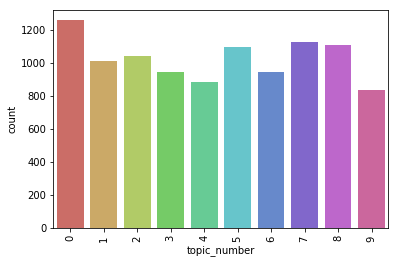

In [0]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news) # TRAIN Document Vector

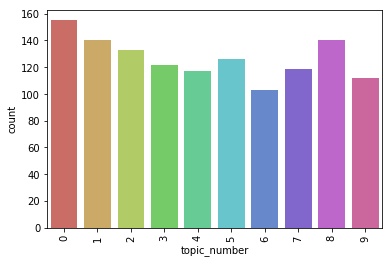

In [0]:
create_distribution(test_news)# TEST Document Vector

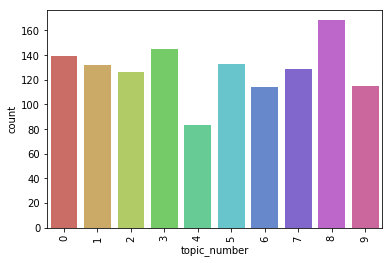

In [0]:
create_distribution(valid_news)# VALID Document Vector

##### Saved the latest dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/train_lda.csv", sep=',')
test_news.to_csv("/content/test_lda.csv", sep=',')
valid_news.to_csv("/content/valid_lda.csv", sep=',')

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class LDATopicModelling():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
        dataTrain = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/lda/train_lda.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/lda/test_lda.csv', sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['topic_number'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['topic_number'], predicted_LogR)
        print("LDA Topic Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# lda = LDATopicModelling()
# lda.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [0]:
ldaTopicModelling = LDATopicModelling()

LDA Topic Model Trained - accuracy:   0.312796


In [0]:
def DATAMINERS_getLDATopicModellingScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = ldaTopicModelling.predict(text)
    return (float(probValue))

print(DATAMINERS_getLDATopicModellingScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.10563214630902829


# Feature 3:  Sensational Feature Analysis

#### [Sensational Words Corpus](https://www.thepersuasionrevolution.com/380-high-emotion-persuasive-words/)

>  Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis.

> Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

Words that are used:
- When you are trying to sell people a solution
- When you are trying to get them to take an action (like, share, subscribe, buy)
- When you are trying to get people to click and read your article
- When you are trying to get someone to agree with you

**There are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article**

> I have used these words to perform cosin similarity and predict the sensational similarity score for each news in the give dataset.

In [0]:
columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
dataTrain = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/lda/train_lda.csv', sep=',', header=None, names = columnNames)
dataTest = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/lda/test_lda.csv', sep=',', header=None, names = columnNames)

#dropping columns
columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index', 'topic_number', 'lda_score', 'topic_top_words']
train_news = dataTrain.drop(columns=columnsToRemove)
test_news = dataTest.drop(columns=columnsToRemove)
train_news = train_news.loc[1:] 
test_news = test_news.loc[1:]
    

In [0]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sensationalism/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

1443


## SenticNet:   

#### Data Enrichment 

> It provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. 
SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.

In [0]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sensationalism/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [0]:
# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


## TF-IDF and Cosine Similarity

#### TF-IDF

> TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [0]:
tfidf_corpus.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [0]:
tfidfVec.vocabulary_

{'absolutely': 1,
 'advantage': 3,
 'qaeda': 742,
 'amazing': 4,
 'antagonistic': 6,
 'attack': 14,
 'authentic': 15,
 'authority': 16,
 'banned': 21,
 'behind': 24,
 'the': 929,
 'scenes': 881,
 'best': 26,
 'bill': 28,
 'bitterness': 29,
 'black': 31,
 'market': 187,
 'blacklisted': 32,
 'blissful': 34,
 'up': 990,
 'breathtaking': 37,
 'campaign': 40,
 'for': 95,
 'censored': 42,
 'cheer': 44,
 'cheerful': 45,
 'church': 47,
 'class': 48,
 'concealed': 52,
 'confessions': 53,
 'confidential': 55,
 'control': 59,
 'controversial': 61,
 'cost': 62,
 'cover': 63,
 'crime': 64,
 'critical': 65,
 'infrastructure': 126,
 'cyber': 67,
 'security': 886,
 'terror': 928,
 'daring': 68,
 'of': 388,
 'desire': 71,
 'disastrous': 72,
 'drug': 76,
 'ecstatic': 79,
 'on': 409,
 'emergency': 81,
 'response': 859,
 'enforcement': 83,
 'eye': 85,
 'opening': 415,
 'faith': 86,
 'faithfulness': 87,
 'fbi': 89,
 'first': 93,
 'responder': 858,
 'high': 118,
 'forbidden': 96,
 'force': 97,
 'fire': 92,


In [0]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


# valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
# print('Valid dim:', valid_tfidf.shape)
# print(valid_tfidf.A[:10])

Training dim: (10239, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (1266, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



#### Cosine Similarity Score

> The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we’re not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents.

> I have compared the sentiment vector of each doucment and estimated a similarity score which is saved as a column in the training and test dataset. 

In [0]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [0]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

,headline_text,clean,sensational_score
1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.061786
2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.059743
3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.052559
4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.066800
5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.048691


In [0]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

,headline_text,clean,sensational_score
1.0,Wisconsin is on pace to double the number of l...,wisconsin pace doubl number layoff year,0.019047
2.0,Says John McCain has done nothing to help the ...,say john mccain done noth help vet,0.026551
3.0,Suzanne Bonamici supports a plan that will cut...,suzanne bonamici support plan cut choice medic...,0.061022
4.0,When asked by a reporter whether hes at the ce...,ask report whether he center crimini scheme vi...,0.065230
5.0,Over the past five years the federal governmen...,past five year feder govern paid million retir...,0.066946


##### Saved the latest dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/train_sensationalism.csv", sep=',')
test_news.to_csv("/content/test_sensationalism.csv", sep=',')
valid_news.to_csv("/content/valid_sensationalism.csv", sep=',')

In [0]:
import numpy as np
columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
dataTrain = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sensationalism/train_sensationalism.csv', sep=',', header=None, names = columnNames)
dataTest = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sensationalism/test_sensationalism.csv', sep=',', header=None, names = columnNames)

dataTrain = dataTrain.loc[1:]
dataTest = dataTest.loc[1:]


dataTrain.head(5)

,jsonid,headline_text,clean,sensational_score
1,1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.0617855637213337
2,2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.05974269381960995
3,3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.05255867153636662
4,4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.0667999552542814
5,5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.04869082661404933


In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer


class SensationalismFeature():

    def __init__(self):        

        columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
        dataTrain = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sensationalism/train_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/sensationalism/test_sensationalism.csv', sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
            
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df = 30, use_idf = True, smooth_idf = True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf', LogisticRegression(solver='liblinear', C = 32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['sensational_score'].astype(str))
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['sensational_score'].astype(str), predicted_LogR)
        print("Sensationalism Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sf = SensationalismFeature()
# sf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sensationalism Model Trained - accuracy:   0.031596


In [0]:
def DATAMINERS_getSensationalismScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = sf.predict(text)
    return (float(probValue*100))

print(DATAMINERS_getSensationalismScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.010105770859692713


# Feature 4: Political Affiliation Model 

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import itertools

class PartyAffiliation():
    
    # API to check whether the subject(Headline) is present in the 
    # - democrats most used words if the party affiliation is democrat
    # - republicans most used words if the part affiliation is republican
    def partyAffiliationFromHeadline(self, r):
        v = r['subject_str']
        p = r['party_str']
        if (p =='democrat'):
            s2 = set(self.countDemV.get_feature_names())
        if (p =='republican'):
            s2 = set(self.countRepV.get_feature_names())
        if (p != 'democract' and p !='republican'):
            return 1 #'true'        
        if set(v).intersection(s2):
            return 1 #'true'
        else:
            return 0 #'false'

    #API to convert true, mostly-true and half-true to true
    # false, barely-true and pants-fire to false
    def convertMulticlassToBinaryclass(self, r):
        v = r['label']
        if (v == 'true'):
            return 1 #'true'
        if (v == 'mostly-true'):
            return 1 #'true'
        if (v == 'half-true'):
            return 1 #'true'
        if (v == 'barely-true'):
            return 0 #'false'
        if (v == 'false'):
            return 0 #'false'
        if (v == 'pants-fire'):
            return 0 #'false'
            
            
            
    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')       
            
    
    def __init__(self):        

        columnNamesPar = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrainPar = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/train.tsv', sep='\t', header=None, names = columnNamesPar)
        dataValidatePar = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/valid.tsv', sep='\t', header=None, names = columnNamesPar)
        dataTestPar = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/test.tsv', sep='\t', header=None, names = columnNamesPar)
        
    
        # Remove unwanted columns in the dataset
        columnsToRemovePar = ['id', 'speaker', 'context','speaker_job_title', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrainPar = dataTrainPar.drop(columns=columnsToRemovePar)
        dataValidatePar = dataValidatePar.drop(columns=columnsToRemovePar)
        dataTestPar = dataTestPar.drop(columns=columnsToRemovePar)
        
        # convert the labels to true and false only
        dataTrainPar['label'] = dataTrainPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataValidatePar['label'] = dataValidatePar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataTestPar['label'] = dataTestPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        
        # display all the party affiliations and show the count of each party 
#         dataTrainPar.groupby('party_affiliation').count()[['state_info']].rename(
#         columns={'state_info': 'count'}).sort_values(
#         'count', ascending=False).reset_index().plot.bar(
#         x='party_affiliation', y='count', figsize=(16, 10), fontsize=18);
        
        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations
        rowsToRemove = ['Moderate', 'activist', 'business-leader', 'columnist', 'constitution-party', 'democratic-farmer-labor', 'education-official', 'government-body', 'green', 'independent', 'journalist', 'labor-leader', 'liberal-party-canada', 'libertarian', 'nan', 'newsmaker', 'ocean-state-tea-party-action', 'organization', 'state-official', 'talk-show-host', 'tea-party-member']

        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'Moderate']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'activist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'business-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'columnist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'constitution-party']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'democratic-farmer-labor']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'education-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'government-body']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'green']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'independent']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'journalist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'labor-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'liberal-party-canada']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'libertarian']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'nan']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'newsmaker']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'organization']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'state-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'talk-show-host']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'tea-party-member']

        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations

        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'Moderate']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'activist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'business-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'columnist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'constitution-party']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'democratic-farmer-labor']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'education-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'government-body']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'green']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'independent']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'journalist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'labor-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'liberal-party-canada']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'libertarian']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'nan']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'newsmaker']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'organization']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'state-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'talk-show-host']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'tea-party-member']

        
        dataTrainPar['party_str'] = dataTrainPar['party_affiliation'].astype(str)
        dataTestPar['party_str'] = dataTestPar['party_affiliation'].astype(str)
        

        #predicting truth level
#        dataTrainPar.groupby('label').count()[['party_affiliation']].reset_index().plot.bar(x='label', y='party_affiliation')
        
        # get the most used democrat words
        self.countDemV = CountVectorizer(stop_words='english', min_df=40, max_df=80, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        dataTrainDem= dataTrainPar
        dataTrainDem = dataTrainPar.loc[dataTrainPar['party_str'] == 'democrat']
        dem_count = self.countDemV.fit_transform(dataTrainDem['statement'].values)
        
        #get the republican most used words
        
        self.countRepV = CountVectorizer(stop_words='english', min_df=20, max_df=40, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        dataTrainRep= dataTrainPar
        dataTrainRep = dataTrainPar.loc[dataTrainPar['party_str'] == 'republican']
        rep_count = self.countRepV.fit_transform(dataTrainRep['statement'].values)

        dataTestDem= dataTestPar
        dataTestDem = dataTestPar.loc[dataTestPar['party_str'] == 'democrat']
        
        dataTrainPar['subject_str'] = dataTrainPar['subject'].astype(str).str.split() 
        dataTrainPar['label_str'] = dataTrainPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTestPar['subject_str'] = dataTestPar['subject'].astype(str).str.split() 
        dataTestPar['label_str'] = dataTestPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTrainDem['subject_str'] = dataTrainDem['subject'].astype(str).str.split() 
        dataTrainDem['label_str'] = dataTrainDem.apply(self.partyAffiliationFromHeadline, axis=1)
    
        dataTestDem['subject_str'] = dataTestDem['subject'].astype(str).str.split() 
        dataTestDem['label_str'] = dataTestDem.apply(self.partyAffiliationFromHeadline, axis=1)
        
        
        self.model = LogisticRegression()
        self.model = self.model.fit(dataTrainPar['label_str'].values.reshape(-1, 1), dataTrainPar['label'].values)
        predicted_LogR = self.model.predict(dataTestPar['label_str'].values.reshape(-1, 1))
        score = metrics.accuracy_score(dataTestPar['label'], predicted_LogR)
        print("Party Affiliation Model Trained - accuracy:   %0.6f" % score)

    
    def predict(self, headline, party):
                
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['subject', 'party_str'])
        dfrme['subject_str'] = headline
        dfrme['party_str'] = party        

        dfrme['subject'] = headline
        dfrme['subject_str'] = dfrme['subject'].astype(str).str.split() 
        dfrme['label_str'] = dfrme.apply(self.partyAffiliationFromHeadline, axis=1)
        
        x = dfrme['label_str'].values.reshape(-1, 1)
        predicted = self.model.predict(x)
        predicedProb = self.model.predict_proba(x)[:,1]
        return predicted, predicedProb
                    
    
##testing code
f = PartyAffiliation()
#pf.predict("Says the Annies List political group supports third-trimester abortions on demand", "republican")

Party Affiliation Model Trained - accuracy:   0.565436


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import pandas as pd
import numpy as np
import os

def loadJsonFiles(directory, veracity):    
    shouldAppend = False
    for filename in os.listdir(directory):
        df2 = pd.read_json(directory + filename, lines=True)
        if (shouldAppend):
            df = df.append(df2, ignore_index=True, sort=True)      
        else:
            df = df2
        df['veracity'] = veracity
        shouldAppend = True
        
            
    # removing nan values    
    df['source'].fillna("", inplace=True)
    for index, row in df.iterrows():
        if (type(row['authors']) == float):
            df.at[index, 'authors'] = []

            
    #removing unnecessary columns
    df = df.drop(columns=['keywords','meta_data','movies', 'keywords', 'summary', 'publish_date','top_img'])
    return df

def loadDataset():
    dataFake = loadJsonFiles('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/politifact/FakeNewsContent/', 0)
    dataReal = loadJsonFiles('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/politifact/RealNewsContent/', 1)
    return dataReal, dataFake

dataFake, dataReal = loadDataset()

dataTrainFake = dataFake[:100]
dataTrainReal = dataReal[:100]
dataTestFake = dataFake[101:]
dataTestReal = dataReal[101:]

dataTest = dataTestFake.append(dataTestReal,ignore_index=True, sort=True)      
dataTrain = dataTrainFake.append(dataTrainReal,ignore_index=True, sort=True)    
dataAll = dataFake.append(dataReal, ignore_index=True, sort=True)      
dataAll.head()

,authors,canonical_link,images,source,text,title,url,veracity
0,"[Jack Shafer, Burgess Everett, Seung Min Kim, ...",http://www.politico.com/story/2016/09/zika-fun...,[http://static.politico.com/ae/2d/1a0119fa45b8...,http://politi.co,"""I would encourage our colleagues across the a...",McConnell punts budget vote to buy time for deal,http://politi.co/2cksDqD,1
1,"[Colin Taylor, Grant Stern, Brett Bose, Natali...",http://occupydemocrats.com/2016/09/21/massive-...,[http://occupydemocrats.com/wp-content/uploads...,http://occupydemocrats.com,12k SHARES SHARE THIS STORY\n\nMassive protest...,Massive Protests Erupt In North Carolina After...,http://occupydemocrats.com/2016/09/21/massive-...,1
2,[],http://rightwingnews.com/top-news/famous-dog-k...,[http://rightwingnews.com/wp-content/uploads/2...,http://rightwingnews.com,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,1
3,"[Jack Shafer, Robert Strauss]",http://www.politico.com/magazine/story/2016/09...,"[data:image/gif;base64,R0lGODlhAQABAAAAACH5BAE...",http://politi.co,"As my 25th wedding anniversary approached, I t...",Worst. President. Ever.,http://politi.co/2cGdput,1
4,[],NaN,NaN,,The University of North Dakota is investigatin...,'Locked the black bitch out': White students u...,NaN,1


In [0]:
# from ipynb.fs.full.m_partyaffiliation import PartyAffiliation
partyAffiliation = PartyAffiliation()

Party Affiliation Model Trained - accuracy:   0.565436


In [0]:
def DATAMINERS_getPartyAffiliationScore(headline, partyName): # return between 0 and 1, being 0 = True,  1 = Fake
    if ( (headline == "") | (partyName == "") ):
        return 0
    binaryValue, probValue = partyAffiliation.predict(headline, partyName)
    return (1 - float(probValue))

print(DATAMINERS_getPartyAffiliationScore("Says the Annies List political group supports third-trimester abortions on demand", "republican"))

0.39560573321891


# Feature 5: Click Bait 

In [0]:
class Clickbait():
    
    question_words = ['who', 'whos', 'whose', 'what', 'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt',
            'where', 'wheres', 'whered', 'why', 'whys', 'can', 'cant', 'could', 'will', 'would', 'is',
            'isnt', 'should', 'shouldnt', 'you', 'your', 'youre', 'youll', 'youd', 'here', 'heres',
            'how', 'hows', 'howd', 'this', 'are', 'arent', 'which', 'does', 'doesnt']

    contractions = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve', 'mustve', 'neednt', 'oclock', 'ol', 'oughtnt',
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'thatll', 'thats', 'thatd', 'thered', 'therednt', 'theredntve',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'theyre', 'theyve', 'theyvent', 'wasnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve', 'wouldve', 'wouldnt', 'wouldntve', 'yall', 'yalldve',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll', 'youre', 'yourent', 'youve', 'youvent']
    
    def process_text(self, text):
        result = text.replace('/', '').replace('\n', '')
        result = re.sub(r'[1-9]+', 'number', result)
        result = re.sub(r'(\w)(\1{2,})', r'\1', result)
        result = re.sub(r'(?x)\b(?=\w*\d)\w+\s*', '', result)
        result = ''.join(t for t in result if t not in punctuation)
        result = re.sub(r' +', ' ', result).lower().strip()
        return result
    
    def cnt_stop_words(self, text):
        s = text.split()
        num = len([word for word in s if word in self.stop])
        return num

    def num_contract(self, text):
        s = text.split()
        num = len([word for word in s if word in self.contractions])
        return num

    def question_word(self, text):
        s = text.split()
        if s[0] in self.question_words:
            return 1
        else:
            return 0

    def part_of_speech(self, text):
        s = text.split()
        nonstop = [word for word in s if word not in self.stop]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos


    def __init__(self):        
        df_ycb = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/clickbait/clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ycb['clickbait'] = 1

        df_ncb = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/clickbait/non_clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ncb['clickbait'] = 0

        df = df_ycb.append(df_ncb, ignore_index=True).reset_index(drop=True)

        

       
        self.stop = stopwords.words('english')
       
        # Creating some latent variables from the data
        df['text']     = df['text'].apply(self.process_text)
        df['question'] = df['text'].apply(self.question_word)

        df['num_words']       = df['text'].apply(lambda x: len(x.split()))
        df['part_speech']     = df['text'].apply(self.part_of_speech)
        df['num_contract']    = df['text'].apply(self.num_contract)
        df['num_stop_words']  = df['text'].apply(self.cnt_stop_words)
        df['stop_word_ratio'] = df['num_stop_words']/df['num_words']
        df['contract_ratio']  = df['num_contract']/df['num_words']

        
        df.drop(['num_stop_words','num_contract'], axis=1, inplace=True)

        df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

        self.tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1)

        X_train_text = self.tfidf.fit_transform(df_train['text'])
        X_test_text  = self.tfidf.transform(df_test['text'])

        self.cvec = CountVectorizer()

        X_train_pos = self.cvec.fit_transform(df_train['part_speech'])
        X_test_pos  = self.cvec.transform(df_test['part_speech'])

        self.scNoMean = StandardScaler(with_mean=False)  # we pass with_mean=False to preserve the sparse matrix
        X_train_pos_sc = self.scNoMean.fit_transform(X_train_pos)
        X_test_pos_sc  = self.scNoMean.transform(X_test_pos)

        X_train_val = df_train.drop(['clickbait','text','part_speech'], axis=1).values
        X_test_val  = df_test.drop(['clickbait','text','part_speech'], axis=1).values

        self.sc = StandardScaler()
        X_train_val_sc = self.sc.fit(X_train_val).transform(X_train_val)
        X_test_val_sc  = self.sc.transform(X_test_val)

        y_train = df_train['clickbait'].values
        y_test  = df_test['clickbait'].values



        X_train = sparse.hstack([X_train_val_sc, X_train_text, X_train_pos_sc]).tocsr()
        X_test  = sparse.hstack([X_test_val_sc, X_test_text, X_test_pos_sc]).tocsr()

        self.model = LogisticRegression(penalty='l2', C=98.94736842105263)
        self.model = self.model.fit(X_train, y_train)
        
        predicted_LogR = self.model.predict(X_test)
        score = metrics.accuracy_score(y_test, predicted_LogR)
        print("Clickbait Model Trained - accuracy:   %0.6f" % score)

#     predict = model.predict(X_test)
#     print(classification_report(y_test, predict))


    def predict(self, text):
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['text'])
        dfrme['text'] = text

        #processing text
        dfrme['text']     = dfrme['text'].apply(self.process_text)

        #adding latent variables
        dfrme['question'] = dfrme['text'].apply(self.question_word)
        dfrme['num_words']       = dfrme['text'].apply(lambda x: len(x.split()))
        dfrme['part_speech']     = dfrme['text'].apply(self.part_of_speech)
        dfrme['num_contract']    = dfrme['text'].apply(self.num_contract)
        dfrme['num_stop_words']  = dfrme['text'].apply(self.cnt_stop_words)
        dfrme['stop_word_ratio'] = dfrme['num_stop_words']/dfrme['num_words']
        dfrme['contract_ratio']  = dfrme['num_contract']/dfrme['num_words']

        #removing latent variables that have high colinearity with other features
        dfrme.drop(['num_stop_words','num_contract'], axis=1, inplace=True)


        Xtxt_val  = dfrme.drop(['text','part_speech'], axis=1).values
        Xtxt_val_sc  = self.sc.transform(Xtxt_val)

        Xtxt_text  = self.tfidf.transform(dfrme['text'])

        Xtxt_pos  = self.cvec.transform(dfrme['part_speech'])
        Xtxt_pos_sc  = self.scNoMean.transform(Xtxt_pos)
        Xtxt  = sparse.hstack([Xtxt_val_sc, Xtxt_text, Xtxt_pos_sc]).tocsr()

        predicted = self.model.predict(Xtxt)
        predicedProb = self.model.predict_proba(Xtxt)[:,1]
        return predicted, predicedProb

In [0]:
# from ipynb.fs.full.m_clickbait import Clickbait
clickBait = Clickbait()

Clickbait Model Trained - accuracy:   0.976875


In [0]:
def DATAMINERS_getClickbaitScore(headline): # return between 0 and 1, being 0 = True,  1 = Fake
    if (headline == ""):
        return 0
    binaryValue, probValue = clickBait.predict(headline)
    return float(probValue)

print(DATAMINERS_getClickbaitScore("Should You bring the money now"))

0.9985038677289918


# Feature 6 : Spam Score

#### Function to simplify label classes

* Original --	True
* True	--	True
* Mostly-true	-- True
* Half-true	-- True
* Barely-true	-- False
* False	-- False
* Pants-fire	-- False

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

class SpamScoreFeature():
    def __init__(self): 
        #load the dataset
        columnNames = ["encoded_label", "headline_text", "sensational_vector"]
        dataTrain = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/spam/train_sensational_feature.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/spam/test_sensational_feature.csv', sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
        
        #load the spam dictionary
        spam_dict = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/spam/spam_dict.csv', usecols= [1], names = ['spamword'], encoding='latin-1', error_bad_lines=False)
        spam_dict = spam_dict.fillna(0)
        spam_dict = spam_dict.iloc[1:]
        spam_dict = spam_dict.drop_duplicates()

        # spam_dict.head(5)
        #Count vector for train data
        spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
        train_count = spamcountV.fit_transform(dataTrain['headline_text'])
       
   
        self.logR_pipeline = Pipeline([
            ('NBCV',spamcountV),
            ('nb_clf',MultinomialNB())])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['encoded_label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['encoded_label'], predicted_LogR)
        print("Spam Score Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
spamscore = SpamScoreFeature()
spamscore.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Spam Score Model Trained - accuracy:   0.000000


(True, 9.766578767457755e-05)

In [0]:
def DATAMINERS_getSpamScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = spamscore.predict(text)
    return (float(probValue))

print(DATAMINERS_getSpamScore("Says the Annies List political group supports third-trimester abortions on demand."))

9.766578767457755e-05


#### Read the input data files

# Feature 7 : Author Credibility

In [0]:
dataAllAuthorsVeracity = dataAll.copy()

fakeZero = 0
fakeOne = 0
falseMoreThanOne = 0
trueZero = 0
trueOne = 0
trueMoreThanOne = 0
for index, row in dataAllAuthorsVeracity.iterrows():
    authorsCount = len(row['authors'])
    dataAllAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
    if (authorsCount == 0):
        if (row['veracity'] == 1):
            trueZero += 1
        else:
            fakeZero += 1
    elif (authorsCount == 1):
        if (row['veracity'] == 1):
            trueOne += 1
        else:
            fakeOne += 1
    elif (authorsCount > 1):
        if (row['veracity'] == 1):
            trueMoreThanOne += 1
        else:
            falseMoreThanOne += 1

print("trueZeroAuthors=", trueZero)
print("fakeZeroAuthors=", fakeZero)
print("trueOneAuthors=", trueOne)
print("fakeOneAuthors=", fakeOne)
print("trueMoreThanOneAuthors=", trueMoreThanOne)
print("fakeMoreThanOneAuthors=", falseMoreThanOne)

columnsToRemove = ['authors', 'canonical_link', 'images', 'source','url', 'text', 'title']
dataAllAuthorsVeracity = dataAllAuthorsVeracity.drop(columns=columnsToRemove)
dataAllAuthorsVeracity.head()

trueZeroAuthors= 13
fakeZeroAuthors= 85
trueOneAuthors= 36
fakeOneAuthors= 24
trueMoreThanOneAuthors= 71
fakeMoreThanOneAuthors= 11


,veracity,authors_count
0,1,4.0
1,1,4.0
2,1,0.0
3,1,2.0
4,1,0.0


In [0]:
dataTrainAuthorsVeracity = dataTrain.copy()
dataTestAuthorsVeracity = dataTest.copy()

for index, row in dataTrainAuthorsVeracity.iterrows():
    dataTrainAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])

for index, row in dataTestAuthorsVeracity.iterrows():
    dataTestAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
            

In [0]:
import matplotlib.pyplot as plt
X_train = dataTrainAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_train = dataTrainAuthorsVeracity['veracity'].values
X_test = dataTestAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_test = dataTestAuthorsVeracity['veracity'].values.reshape(-1, 1)


from sklearn import linear_model
logClassifierAuthorsCount = linear_model.LogisticRegression(solver='liblinear', C=1, random_state=111)
logClassifierAuthorsCount.fit(X_train, Y_train)
predicted = logClassifierAuthorsCount.predict(X_test)

from sklearn import metrics
print("accuracy=", metrics.accuracy_score(Y_test, predicted))

accuracy= 0.8157894736842105


In [0]:
def DATAMINERS_getAuthorScore(numAuthors): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(numAuthors).reshape(-1, 1)
    predicted = logClassifierAuthorsCount.predict(x)
    predicedProbTrue = logClassifierAuthorsCount.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProbTrue)

print(DATAMINERS_getAuthorScore(4))

0.015660137851400635


In [0]:
import pandas as pd
dataFakeNewsSites = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/politifact-fakenews-sites.csv")
dataFakeNewsSites.head()

,site name,type of site,registration
0,16wmpo.com,imposter site,"scottsdale, ariz. **"
1,24online.news,imposter site,"panama, pa. **"
2,24wpn.com,fake news,"veles, macedonia"
3,24x365live.com,fake news,"kobenhavn, denmark"
4,247newsmedia.com,fake news,"kumanovo, macedonia"


# Feature 8 : Source Reputation

In [0]:
dataFakeNewsSites['type of site'].unique()

array(['imposter site', 'fake news', 'parody site', 'some fake stories'],
      dtype=object)

As we can see, the sources are classified in different categories. Almost are all fake (fake news, parody,..) except the category 'some fake stories'. So let's hot encode those categories as 1 for fake news and 0.5 for some fake news.

In [0]:
for index, row in dataFakeNewsSites.iterrows():
    score = 1
    if (row['type of site'] == 'some fake stories'):
        score = 0.5
    dataFakeNewsSites.at[index, 'fake_score'] = score

dataFakeNewsSites.head()

,site name,type of site,registration,fake_score
0,16wmpo.com,imposter site,"scottsdale, ariz. **",1.0
1,24online.news,imposter site,"panama, pa. **",1.0
2,24wpn.com,fake news,"veles, macedonia",1.0
3,24x365live.com,fake news,"kobenhavn, denmark",1.0
4,247newsmedia.com,fake news,"kumanovo, macedonia",1.0


In [0]:
def DATAMINERS_getSourceReputationScore(source): # return between 0 and 1, being 0 = True,  1 = Fake
    if (source == ""):
        return 0
    d = dataFakeNewsSites[dataFakeNewsSites['site name'].str.match(source)]
    if (d['fake_score'].empty):
        return 0
    return int(d['fake_score'].values)


DATAMINERS_getSourceReputationScore('24wpn')

1

# Feature 9 : Content Length

Model slope:     2.8672921260228002e-05
Model intercept: 0.41180985978637996
R2 score: 0.04612397796223433


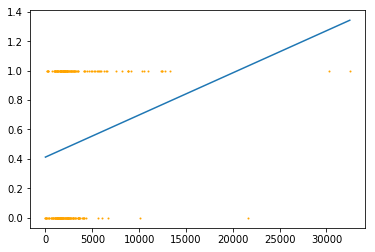

In [0]:
dataAllBodyLength = dataAll.copy()
for index, row in dataAllBodyLength.iterrows():
    textLength = len(row['text'])
    dataAllBodyLength.at[index, 'text_length'] = textLength


import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
linearRegressionBodyLength = LinearRegression(fit_intercept=True)

A = np.array(list(dataAllBodyLength.text_length))
B = np.array(list(dataAllBodyLength.veracity))

linearRegressionBodyLength.fit(A[:, np.newaxis], B)

xfit = np.linspace(-1, max(dataAllBodyLength.text_length), 1000)
yfit = linearRegressionBodyLength.predict(xfit[:, np.newaxis])

plt.scatter(A, B, s=1, c="orange")
plt.plot(xfit, yfit);

print("Model slope:    ", linearRegressionBodyLength.coef_[0])
print("Model intercept:", linearRegressionBodyLength.intercept_)
print("R2 score:", linearRegressionBodyLength.score(A[:, np.newaxis], B))

In [0]:
for index, row in dataTrain.iterrows():
    textLength = len(row['text'])
    dataTrain.at[index, 'text_length'] = textLength

for index, row in dataTest.iterrows():
    textLength = len(row['text'])
    dataTest.at[index, 'text_length'] = textLength

from sklearn import linear_model
# from sklearn import linear_model

logClassifierBodyLength = linear_model.LogisticRegression(solver='liblinear', C=17/1000, random_state=111)
logClassifierBodyLength.fit(dataTrain['text_length'].values.reshape(-1, 1), dataTrain['veracity'].values)

predicted = logClassifierBodyLength.predict(dataTest['text_length'].values.reshape(-1, 1))

from sklearn import metrics
print(metrics.accuracy_score(dataTest['veracity'].values.reshape(-1, 1), predicted))

0.7368421052631579


In [0]:
def DATAMINERS_getBodyLengthScore(length): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(length).reshape(-1, 1)
    predicted = logClassifierBodyLength.predict(x)
    predicedProb = logClassifierBodyLength.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProb)

print(DATAMINERS_getBodyLengthScore(12000))

0.19795226141916122


# Feature 10 : Word Frequency

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics

class WordFrequency():

    def __init__(self):        

        columnNames = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrain = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/train.tsv', sep='\t', header=None, names = columnNames)
        dataValidate = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/valid.tsv', sep='\t', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/test.tsv', sep='\t', header=None, names = columnNames)
        
        #dropping columns
        columnsToRemove = ['id','subject', 'speaker', 'context','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataValidate = dataValidate.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)

        def convertMulticlassToBinaryclass(r):
            v = r['label']
            if (v == 'true'):
                return 'true'
            if (v == 'mostly-true'):
                return 'true'
            if (v == 'half-true'):
                return 'true'
            if (v == 'barely-true'):
                return 'false'
            if (v == 'false'):
                return 'false'
            if (v == 'pants-fire'):
                return 'false'
        dataTrain['label'] = dataTrain.apply(convertMulticlassToBinaryclass, axis=1)
        dataValidate['label'] = dataValidate.apply(convertMulticlassToBinaryclass, axis=1)
        dataTest['label'] = dataTest.apply(convertMulticlassToBinaryclass, axis=1)
        

    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        train_tfidf = tfidfV.fit_transform(dataTrain['statement'].values)
        test_tfidf = tfidfV.fit_transform(dataTest['statement'].values)

#         print('TF-IDF VECTORIZER')

        ## Removing plurals for the tokens using PorterStemmer
        stemmer = PorterStemmer()
        tfidfVPlurals= tfidfV.get_feature_names()
        tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

        # Applying Set to remove duplicates
        tfidfVTokens = list(set(tfidfVSingles))
#         print('TFIDFV Tokens')
#         print(tfidfVTokens)

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['statement'],dataTrain['label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['statement'])
        score = metrics.accuracy_score(dataTest['label'], predicted_LogR)
        print("Word Frequency Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# wf = WordFrequency()
# wf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [0]:
# from ipynb.fs.full.m_wordfrequency import WordFrequency
wordFrequency = WordFrequency()

Word Frequency Model Trained - accuracy:   0.599053


In [0]:
def DATAMINERS_getWordFrequencyScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = wordFrequency.predict(text)
    return (1 - float(probValue))

print(DATAMINERS_getWordFrequencyScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.5104703891221551


## Title Vs Body : Using Deep Learning : Accuracy 88%

 

-----

Data Set URL: Fake News Challenge
#### | Saurabh Agarwal | Team Neurons |

### Dataset Description 
- BODY ID: tells about the body Id which is unique key
- Headline: Tells about the headline text from the dataset
-Body_text: tells about the related body of the article
-Stance: tells about if Body is related to title or not


### Process Used
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- Vector Classification Modeling 
- Merge all features and individual contributions
- Forming Polynomial Equation 
- Bag of Words Vectorizer
- Batch Wise Training
- Softmax Activation Function
- Adam optimizer
     
#### Enrichment Dataset Details

- Liar Liar dataset with headlines

## Classification Models
- XGBOOST 73%
- Random Forest 74%
- Naive Bayes 74%

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 
-Tensorflow


#### What did I try and What worked? 

-  first Computed TFIDF vectorizer for Title
- Then, TFIDF vectorization for Body
-  Then Found the Cosine Similarity between them
- I tried Deep learning neural network model MLP layers for prediction of wether the title is realted to body or not


#### What did not work?

> I tried to use text summerization but it didnt worked out with good accurcay so I used Deep Learning models


#### What alternatives did you try?

> I tried to create headlines from body text as text summerization, but since it wasn't giving good accuracy so I pivoted to Deep learning approach

----

In [0]:
path = "/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/TitleVsBody/"

from sklearn.feature_extraction.text import CountVectorizer
from csv import DictReader
from sklearn.feature_extraction.text import TfidfTransformer
from csv import DictWriter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf

stop_words = [
        "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had",
        "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made",
        "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be",
        "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
        "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "co",
        "con", "could", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight",
        "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
        "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill", "find", "fire", "first", "five", "for",
        "has", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself",
        "must", "my", "myself", "name", "namely", "neither", "nevertheless", "next", "nine", "nobody", "now", "nowhere",
        "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours",
        "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see",
        "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some",
        "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take",
        "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby",
        "him", "himself", "his", "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed", "interest",
        "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much",
        "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon",
        "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve",
        "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what",
        "a", "about", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along",
        "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
        "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will",
        "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
        "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though",
        ]

## Create a class with Utility Moethods to get and Load Headlines and body from dataset


In [0]:
actual_labels = {'agree': 0, 'disagree': 1, 'discuss': 2, 'unrelated': 3}
actual_labels_rev = {0: 'agree', 1: 'disagree', 2: 'discuss', 3: 'unrelated'}

class AVFactorData:

    def __init__(self, file_instanceText, file_bodyText):

        self.instances = self.read(file_instanceText)
        bodies = self.read(file_bodyText)
        self.heads = {}
        self.bodies = {}

        for instance in self.instances:
            if instance['Headline'] not in self.heads:
                head_id = len(self.heads)
                self.heads[instance['Headline']] = head_id
            instance['Body ID'] = int(instance['Body ID'])

        for body in bodies:
            self.bodies[int(body['Body ID'])] = body['articleBody']

    def read(self, filename):

        rows = []

        with open(filename, "r", encoding='utf-8') as table:
            r = DictReader(table)
            for line in r:
                rows.append(line)

        return rows


def load_model(sess):

    saver = tf.train.Saver()
    saver.restore(sess, '.' + path + 'model/model.checkpoint')


def store_predictedValue(pred, file):

    with open(file, 'w') as csvfile:
        fieldnames = ['Stance']
        writer = DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for instance in pred:
            writer.writerow({'Stance': actual_labels_rev[instance]})


## Create a class with Data pipelines: Train Data Pipeline With COSINE SIMILARITY


In [0]:
def data_pipe_line__train(train, test, lim_unigram):

    head_tfidf_track = {}
    body_tfidf_track = {}
    bodyText_ids = []
    reference_ID = {}
    train_set = []
    train_stances = []
    trackker_cosine = {}
    test_heads = []
    test_tracker_for_headings = {}
    test_bodies = []
    test_bodies_track = {}
    heads = []
    tracker_for_headings = {}
    bodies = []
    bodies_track = {}
    test_bodyText_ids = []
    

    for instance in train.instances:
        head = instance['Headline']
        value_BodyID = instance['Body ID']
        if head not in tracker_for_headings:
            heads.append(head)
            tracker_for_headings[head] = 1
        if value_BodyID not in bodies_track:
            bodies.append(train.bodies[value_BodyID])
            bodies_track[value_BodyID] = 1
            bodyText_ids.append(value_BodyID)

    for instance in test.instances:
        head = instance['Headline']
        value_BodyID = instance['Body ID']
        if head not in test_tracker_for_headings:
            test_heads.append(head)
            test_tracker_for_headings[head] = 1
        if value_BodyID not in test_bodies_track:
            test_bodies.append(test.bodies[value_BodyID])
            test_bodies_track[value_BodyID] = 1
            test_bodyText_ids.append(value_BodyID)

    for i, elem in enumerate(heads + bodyText_ids):
        reference_ID[elem] = i

    bow_vectorizer = CountVectorizer(max_features=lim_unigram, stop_words=stop_words)
    bow = bow_vectorizer.fit_transform(heads + bodies) 

    tfreq_vectorizer = TfidfTransformer(use_idf=False).fit(bow)
    tfreq = tfreq_vectorizer.transform(bow).toarray()

    tfidf_vectorizer = TfidfVectorizer(max_features=lim_unigram, stop_words=stop_words).\
        fit(heads + bodies + test_heads + test_bodies) 

    for instance in train.instances:
        head = instance['Headline']
        value_BodyID = instance['Body ID']
        head_tf = tfreq[reference_ID[head]].reshape(1, -1)
        body_tf = tfreq[reference_ID[value_BodyID]].reshape(1, -1)
        if head not in head_tfidf_track:
            head_tfidf = tfidf_vectorizer.transform([head]).toarray()
            head_tfidf_track[head] = head_tfidf
        else:
            head_tfidf = head_tfidf_track[head]
        if value_BodyID not in body_tfidf_track:
            body_tfidf = tfidf_vectorizer.transform([train.bodies[value_BodyID]]).toarray()
            body_tfidf_track[value_BodyID] = body_tfidf
        else:
            body_tfidf = body_tfidf_track[value_BodyID]
        if (head, value_BodyID) not in trackker_cosine:
            tfidf_cos = cosine_similarity(head_tfidf, body_tfidf)[0].reshape(1, 1)
            trackker_cosine[(head, value_BodyID)] = tfidf_cos
        else:
            tfidf_cos = trackker_cosine[(head, value_BodyID)]
        feat_vec = np.squeeze(np.c_[head_tf, body_tf, tfidf_cos])
        train_set.append(feat_vec)
        train_stances.append(actual_labels[instance['Stance']])

    return train_set, train_stances, bow_vectorizer, tfreq_vectorizer, tfidf_vectorizer

## Create a class with Data pipelines: Test Data Set Pipeline WITH COSINE SIMILARITY


In [0]:
def data_pipe_line__test(test, bow_vectorizer, tfreq_vectorizer, tfidf_vectorizer):

    # Initialise
    test_set = []
    tracker_for_headings = {}
    bodies_track = {}
    trackker_cosine = {}

    # Process test set
    for instance in test.instances:
        head = instance['Headline']
        value_BodyID = instance['Body ID']
        if head not in tracker_for_headings:
            head_bow = bow_vectorizer.transform([head]).toarray()
            head_tf = tfreq_vectorizer.transform(head_bow).toarray()[0].reshape(1, -1)
            head_tfidf = tfidf_vectorizer.transform([head]).toarray().reshape(1, -1)
            tracker_for_headings[head] = (head_tf, head_tfidf)
        else:
            head_tf = tracker_for_headings[head][0]
            head_tfidf = tracker_for_headings[head][1]
        if value_BodyID not in bodies_track:
            body_bow = bow_vectorizer.transform([test.bodies[value_BodyID]]).toarray()
            body_tf = tfreq_vectorizer.transform(body_bow).toarray()[0].reshape(1, -1)
            body_tfidf = tfidf_vectorizer.transform([test.bodies[value_BodyID]]).toarray().reshape(1, -1)
            bodies_track[value_BodyID] = (body_tf, body_tfidf)
        else:
            body_tf = bodies_track[value_BodyID][0]
            body_tfidf = bodies_track[value_BodyID][1]
        if (head, value_BodyID) not in trackker_cosine:
            tfidf_cos = cosine_similarity(head_tfidf, body_tfidf)[0].reshape(1, 1)
            trackker_cosine[(head, value_BodyID)] = tfidf_cos
        else:
            tfidf_cos = trackker_cosine[(head, value_BodyID)]
        feat_vec = np.squeeze(np.c_[head_tf, body_tf, tfidf_cos])
        test_set.append(feat_vec)

    return test_set


## Tensorflow: Initialise the Hyper parameters:


- size_of_batch_train = 500
- iterations_epoch = 90
- hidden_size = 100
- prob_keep_train = 0.6
- l2_alpha = 0.00001
- learn_rate = 0.01
- lim_unigram = 5000
- y_size_target = 4
- size_clip_ratio = 5

In [0]:
import random
import tensorflow as tf

mode = 'train'

#Training DataSet
file_train_instances = path + "train_stances.csv"
file_train_bodies = path + "train_bodies.csv"

#Testing DataSet
file_test_instances = path + "test_stances_unlabeled.csv"
file_test_bodies = path + "test_bodies.csv"

#Prediction File with only Stances:
file_predictions = path + 'prediction_values.csv'


# Initialise hyperparameters
r = random.Random()
size_of_batch_train = 500
iterations_epoch = 90
hidden_size = 100
prob_keep_train = 0.6
l2_alpha = 0.00001
learn_rate = 0.01
lim_unigram = 5000
y_size_target = 4
size_clip_ratio = 5



# Load data sets
data_rawText = AVFactorData(file_train_instances, file_train_bodies)
raw_test = AVFactorData(file_test_instances, file_test_bodies)
n_train = len(data_rawText.instances)


# Process data sets
train_set, train_stances, bow_vectorizer, tfreq_vectorizer, tfidf_vectorizer = \
    data_pipe_line__train(data_rawText, raw_test, lim_unigram=lim_unigram)
feature_size = len(train_set[0])
test_set = data_pipe_line__test(raw_test, bow_vectorizer, tfreq_vectorizer, tfidf_vectorizer)


# Define model

# Create placeholders
features_pl = tf.placeholder(tf.float32, [None, feature_size], 'features')
stances_pl = tf.placeholder(tf.int64, [None], 'stances')

keep_prob_pl = tf.placeholder(tf.float32)

FileNotFoundError: ignored

## Define MLP: Multi Layer Perceptron Neural Network Model

- Define L2 Loss
- Softmax



In [0]:
# Infer batch size
size_of_batch = tf.shape(features_pl)[0]

# Define multi-layer perceptron
latent_hiddenLayer = tf.nn.dropout(tf.nn.relu(tf.contrib.layers.linear(features_pl, hidden_size)), keep_prob=keep_prob_pl)
logits_flat = tf.nn.dropout(tf.contrib.layers.linear(latent_hiddenLayer, y_size_target), keep_prob=keep_prob_pl)
logits = tf.reshape(logits_flat, [size_of_batch, y_size_target])

# Define L2 loss
tf_vars = tf.trainable_variables()
l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in tf_vars if 'bias' not in v.name]) * l2_alpha
loss = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels=stances_pl) + l2_loss)

# Define prediction
softmaxed_logits = tf.nn.softmax(logits)
predict = tf.arg_max(softmaxed_logits, 1)



## Tensoflow: Load the Tensorflow Model


In [0]:
# Load model
if mode == 'load':
    with tf.Session() as sess:
        load_model(sess)


        # Predict
        test_feed_dict = {features_pl: test_set, keep_prob_pl: 1.0}
        test_pred = sess.run(predict, feed_dict=test_feed_dict)

## Tensoflow: Train the Tensorflow Model & Predict


In [0]:
mode = 'train'
# Train model
if mode == 'train':

    # Define optimiser
    opt_func = tf.train.AdamOptimizer(learn_rate)
    gradients, _ = tf.clip_by_global_norm(tf.gradients(loss, tf_vars), size_clip_ratio)
    opt_op = opt_func.apply_gradients(zip(gradients, tf_vars))

    # Perform training
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(iterations_epoch):
            total_loss = 0
            indices = list(range(n_train))
            r.shuffle(indices)

            for i in range(n_train // size_of_batch_train):
                batch_indices = indices[i * size_of_batch_train: (i + 1) * size_of_batch_train]
                batch_features = [train_set[i] for i in batch_indices]
                batch_stances = [train_stances[i] for i in batch_indices]

                batch_feed_dict = {features_pl: batch_features, stances_pl: batch_stances, keep_prob_pl: prob_keep_train}
                _, current_loss = sess.run([opt_op, loss], feed_dict=batch_feed_dict)
                total_loss += current_loss


        # Predict
        test_feed_dict = {features_pl: test_set, keep_prob_pl: 1.0}
        test_pred = sess.run(predict, feed_dict=test_feed_dict)

In [0]:
test_pred[0]
#LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
#Answer Predicted: Unrelated

In [0]:
# Save predictions
store_predictedValue(test_pred, file_predictions)

## Score, Confusion Matrix and Other Utility Methods


In [0]:
from __future__ import division
import csv
import sys


FIELDNAMES = ['Headline', 'Body ID', 'Stance']
LABELS = ['agree', 'disagree', 'discuss', 'unrelated']
RELATED = LABELS[0:3]

USAGE = """
"""

mismatch_data_error = """
"""

GetReport = """
"""

class AVFactorException(Exception):
    pass


def getSubmittedScore(actual_values, test_labels):
    score = 0.0
    confusionMatrix = [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]

    for i, (g, t) in enumerate(zip(actual_values, test_labels)):
        if g['Headline'] != t['Headline'] or g['Body ID'] != t['Body ID']:
            error = mismatch_data_error.format(i+2,
                                          g['Headline'], g['Body ID'],
                                          t['Headline'], t['Body ID'])
            raise AVFactorException(error)
        else:
            stance_g_value, t_stance = g['Stance'], t['Stance']
            if stance_g_value == t_stance:
                score += 0.25
                if stance_g_value != 'unrelated':
                    score += 0.50
            if stance_g_value in RELATED and t_stance in RELATED:
                score += 0.25

        confusionMatrix[LABELS.index(stance_g_value)][LABELS.index(t_stance)] += 1

    return score, confusionMatrix


def score_defaults(actual_values):
    unrelated = [g for g in actual_values if g['Stance'] == 'unrelated']
    score_nullValue = 0.25 * len(unrelated)
    max_score = score_nullValue + (len(actual_values) - len(unrelated))
    return score_nullValue, max_score


def get_dataSet(filename):
    data = None
    try:
        with open(filename) as fh:
            reader = csv.DictReader(fh)
            if reader.fieldnames != FIELDNAMES:
                error = 'ERROR: Incorrect headers in: {}'.format(filename)
                raise AVFactorException(error)
            else:
                data = list(reader)

            if data is None:
                error = 'ERROR: No data found in: {}'.format(filename)
                raise AVFactorException(error)
    except FileNotFoundError:
        error = "ERROR: Could not find file: {}".format(filename)
        raise AVFactorException(error)

    return data


def print_confusion_matrix(confusionMatrix):
    doc_line_data = ['CONFUSION MATRIX:']
    header = "|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format('', *LABELS)
    line_len = len(header)
    doc_line_data.append("-"*line_len)
    doc_line_data.append(header)
    doc_line_data.append("-"*line_len)

    hit = 0
    total = 0
    for i, row in enumerate(confusionMatrix):
        hit += row[i]
        total += sum(row)
        doc_line_data.append("|{:^11}|{:^11}|{:^11}|{:^11}|{:^11}|".format(LABELS[i],
                                                                   *row))
        doc_line_data.append("-"*line_len)
    doc_line_data.append("ACCURACY: {:.3f}".format(hit / total))
    print('\n'.join(doc_line_data))
    
def get_titleVsBodyScore(confusionMatrix):
    hit = 0
    total = 0
    for i, row in enumerate(confusionMatrix):
        hit += row[i]
        total += sum(row)
    return (hit / total)

## Calculate the Score, Accuracy and Confusion Matrix: 88%


In [0]:
import pandas as pd
original = pd.read_csv(path + "competition_test_stances_unlabeled.csv")
predicted = pd.read_csv(path + "prediction_values.csv") # needs to contain pair id
df_merged = original.merge(predicted, how='outer', left_index=True, right_index=True)
df_merged.to_csv(path + 'prediction_final.csv', index=False)

_, actual_filename, test_filename = sys.argv

try:
    actual_values = get_dataSet(path + "competition_test_stances.csv")
    test_labels = get_dataSet(path + "prediction_final.csv")

    score_testValue, confusionMatrix = getSubmittedScore(actual_values, test_labels)
    score_nullValue, max_score = score_defaults(actual_values)
    print_confusion_matrix(confusionMatrix)
    print(GetReport.format(max_score, score_nullValue, score_testValue))

except AVFactorException as e:
    print(e)


In [0]:
test_pred

In [0]:
confusionMatrix

In [0]:
get_titleVsBodyScore(confusionMatrix)

## Get Alternus Vera Score on Test Data Results for Title Vs Body

1.   List item
2.   List item




In [0]:
#test data:
def getAVTitleVsBodyScore(text, headline):
    # Initialise
    test_set = []
    tracker_for_headings = {}
    bodies_track = {}
    trackker_cosine = {}  
    
    head = headline
    
    head_bow = bow_vectorizer.transform([head]).toarray()
    head_tf = tfreq_vectorizer.transform(head_bow).toarray()[0].reshape(1, -1)
    head_tfidf = tfidf_vectorizer.transform([head]).toarray().reshape(1, -1)
    tracker_for_headings[head] = (head_tf, head_tfidf)
    
    body_bow = bow_vectorizer.transform([text]).toarray()
    body_tf = tfreq_vectorizer.transform(body_bow).toarray()[0].reshape(1, -1)
    body_tfidf = tfidf_vectorizer.transform([text]).toarray().reshape(1, -1)
    
    tfidf_cos = cosine_similarity(head_tfidf, body_tfidf)[0].reshape(1, 1)
    
    feat_vec = np.squeeze(np.c_[head_tf, body_tf, tfidf_cos])
    test_set.append(feat_vec)

    return test_set

In [0]:
def getScoreAVTitleVsBodyValue(text, headline):

    # Define optimiser
    opt_func = tf.train.AdamOptimizer(learn_rate)
    gradients, _ = tf.clip_by_global_norm(tf.gradients(loss, tf_vars), size_clip_ratio)
    opt_op = opt_func.apply_gradients(zip(gradients, tf_vars))

    # Perform training
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(iterations_epoch):
            total_loss = 0
            indices = list(range(n_train))
            r.shuffle(indices)

            for i in range(n_train // size_of_batch_train):
                batch_indices = indices[i * size_of_batch_train: (i + 1) * size_of_batch_train]
                batch_features = [train_set[i] for i in batch_indices]
                batch_stances = [train_stances[i] for i in batch_indices]

                batch_feed_dict = {features_pl: batch_features, stances_pl: batch_stances, keep_prob_pl: prob_keep_train}
                _, current_loss = sess.run([opt_op, loss], feed_dict=batch_feed_dict)
                total_loss += current_loss
        
        test_set_1 = getAVTitleVsBodyScore(text, headline)
        # Predict
        test_feed_dict_1 = {features_pl: test_set_1, keep_prob_pl: 1.0}
        test_pred_1 = sess.run(predict, feed_dict=test_feed_dict_1)
        
        #predictions = predict.eval(feed_dict=test_feed_dict_1)
        result = test_pred_1[0]
        # return between 0 and 1, being 0 = True,  1 = Fake
        score = 0
        if result == 0:
          score = 0 
          print('agree')
        if result == 1:
          score = 0.75
          print('disagree')
        if result == 2:
          score = 0.5
          print('discuss')
        if result == 3:
          score = 0.9
          print('unrelated')
        return score

In [0]:
#define score:

In [0]:
def Neurons_getTitleVsBodyScore(headline, text):
    resultScore = getScoreAVTitleVsBodyValue(text, headline)
    return resultScore

In [0]:
result = Neurons_getTitleVsBodyScore("World Cup ends", "Yesterday, the Brazilian soccer team won the world cup by defeating Argentina")
result

##Data Enrichmnet: Distillation and Ammalgamation

- Get Headlines from Fake news challenge dataset
- Enrich liar liar data set with the news
- Get final accuracy and compare with MLP Model 88% Vs 72%




In [0]:
import spacy
import pickle
import pandas as pd
dataSet_columnNames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']
df_liarDataSet = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/train.tsv", sep='\t', names = dataSet_columnNames, error_bad_lines=False)
df_liarDataSet = df_liarDataSet
df_liarDataSet.tail()

In [0]:
df_HeadlineOnly = df_liarDataSet[['headline_text']]
df_HeadlineOnly.tail()

In [0]:
path = "/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/TitleVsBody/"
df_bodyOnly = pd.read_csv(path + "test_bodies.csv", error_bad_lines=False)
df_bodyOnly.tail()

In [0]:
df_titleVsBody = pd.read_csv(path + "prediction_final.csv" , error_bad_lines=False)

In [0]:
df_join_body_title = pd.merge(df_titleVsBody, df_bodyOnly, left_on = 'Body ID', right_on = 'Body ID', how = 'inner')
df_join_body_title.tail()

### Encoding the Traget labels and mapping them with {0: false, 1: true}

In [0]:
df_join_body_title = df_join_body_title.loc[df_join_body_title['Stance'].isin(['agree', 'unrelated'])]
df_join_body_title['new_encoded_stance'] = df_join_body_title['Stance'].map( {'agree':1, 'unrelated':0})

In [0]:
df_join_body_title.tail()
df_join_body_title['Stance'].value_counts()
df_join_body_title = df_join_body_title.sort_values(by=['new_encoded_stance'])
df_join_body_title.tail()

In [0]:
df_liarDataSet = df_liarDataSet.loc[df_liarDataSet['label'].isin(['true', 'false'])]
df_liarDataSet['new_encoded_label'] = df_liarDataSet['label'].map( {'true':1, 'false':0})


In [0]:
df_liarDataSet.tail()
df_liarDataSet['label'].value_counts()
df_liarDataSet = df_liarDataSet.sort_values(by=['new_encoded_label'])
df_liarDataSet.head()

In [0]:
df_liarDataSet['new_encoded_label'].value_counts()


In [0]:
df_liarDataSet.shape[0]

In [0]:
df_join_body_title['new_encoded_stance'].value_counts()

In [0]:
df_join_body_title.shape

In [0]:
df_join_body_title_0 = df_join_body_title.iloc[0:1900] #1900 rows (0)
df_join_body_title_1 = df_join_body_title.iloc[18998:19998] #1000 rows (1)
df_join_body_title_clean = pd.concat([df_join_body_title_0, df_join_body_title_1])
df_join_body_title_clean['new_encoded_stance'].value_counts()

In [0]:
df_liarDataSet_0 = df_liarDataSet.iloc[0:1900] #1900 rows (0)
df_liarDataSet_1 = df_liarDataSet.iloc[2600:3600] #1000 rows (1)
df_liarDataSet_clean = pd.concat([df_liarDataSet_0, df_liarDataSet_1])
df_liarDataSet_clean['new_encoded_label'].value_counts()

In [0]:
df_liarDataSet_clean = df_liarDataSet_clean.sort_values(by=['new_encoded_label'])
df_join_body_title_clean = df_join_body_title_clean.sort_values(by=['new_encoded_stance'])

In [0]:
df_liarDataSet_clean.shape

In [0]:
df_join_body_title_clean.shape

In [0]:
df_liarDataSet_clean = df_liarDataSet_clean[['headline_text', 'label', 'new_encoded_label']]
df_liarDataSet_clean.head(2)

In [0]:
df_join_body_title_clean = df_join_body_title_clean[['Headline', 'Stance', 'new_encoded_stance', 'articleBody']]
df_join_body_title_clean.head(2)

In [0]:
df_join = df_liarDataSet_clean.reset_index(drop=True).merge(df_join_body_title_clean.reset_index(drop=True), left_index=True, right_index=True)
df_join.shape

In [0]:
df_join.tail(2)

In [0]:
df_join['new_headline'] = df_join['Headline'] + " " + df_join['headline_text']
df_join.head(2)

In [0]:
y = df_join['new_encoded_label']
x = df_join['new_headline']

## Data Enrichmnet: Calculate the Accuracy of the enriched data frame: Liar Liar and Fake News Challenge Data sets`



In [0]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')

def text_preprocess(text):
  
    # remove punctuations
    nopunc = [i for i in text if i not in string.punctuation]
    nn = "".join(nopunc)
    
    #take lowercase
    nn = nn.lower().split()
    
    #stop words:
    nostop = [words for words in nn if words not in stopwords.words('english')]
    return(nostop)
    
    #nopunc = [char for char in text if char not in string.punctuation]
    #nopunc = ''.join(nopunc)
    #return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  

## Classification Model - 01: XGBOOST: 73%


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv_transformer = CountVectorizer(analyzer = text_preprocess)
x = cv_transformer.fit_transform(x)

#Split:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)
#XG Boost

import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

xgb = XGBClassifier()
xgb.fit(x_train,y_train)


#Prediction:
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")

from sklearn.metrics import classification_report, confusion_matrix

#Matrix:
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

## Classification Model - 02 : Random Forest: 74%


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini')
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
# RF report
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_rf))
print("Score: ",round(accuracy_score(y_test,pred_rf)*100,2))
print("\n")
print("Classification report\n",classification_report(y_test, pred_rf))

## Classification Model -03 : Naive Bayes: 74%


In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

predictions = nb.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix\n",confusion_matrix(y_test, predictions))
print("Score: ",round(accuracy_score(y_test,predictions)*100,2))
print("\n")
print("Classification report\n",classification_report(y_test, predictions))

# Feature 12 : Confirmation Bias

### Installing and Importing required dependencies

In [0]:
!pip install paramiko

In [0]:
import numpy as np
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import gensim

### BS Detector labelled Data

#### https://www.kaggle.com/mrisdal/fake-news

In [0]:
path= "/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/ConfirmationBias"
data = pd.read_csv(path+"/fake.csv.zip")

In [0]:
data.head(2)

### Labels in the dataset

In [0]:
data['type'].unique()

In [0]:
data.type.value_counts().plot(kind='bar')

### Taking bias and bs labelled data in equal proportion, cleaning, shuffling and doing train test split 

In [0]:
bias_data = data[data['type'] == 'bias']
bias_data.shape

In [0]:
bs_data = data[data['type'] == 'bs']
bs_data = bs_data[0:443]
bs_data.shape

In [0]:
df = pd.concat([bias_data,bs_data])
df.shape

In [0]:
df = df[pd.notnull(df['text'])]

In [0]:
df.shape

### Text preprocessing

In [0]:
import re

def cleaning(raw_news):
        
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [nltk.stem.WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
import time
 

# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
df['clean'] = df["text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(df), "news:", (t2-t1)/60, "min")

#### Dropping Null values

In [0]:
df = df[pd.notnull(df['clean'])]

In [0]:
cd '/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/ConfirmationBias'

In [0]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!cd

In [0]:
### Loading GoogleNews Pretrained index2word model

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/ConfirmationBias/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

### Spell Check Cleaning


In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
  
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

### This cell takes time to run, we have already saved this cleaned data and loading again below

In [0]:
print("Before: \n", df['clean'][0] )
t1 = time.time()
df['clean'] = df['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(df), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",df['clean'][0] )

### Saving cleaned Data for later use

In [0]:
df.to_csv("/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/ConfirmationBias/df_processed.csv",  sep=',')

###Loading from saved clean data

In [0]:

df = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/ConfirmationBias/df_processed.csv")

In [0]:
df['clean'].head()

In [0]:
df = df[pd.notnull(df['clean'])]

In [0]:
df.shape

In [0]:
df_y = df[['type']]
df_X = df.drop(columns=['type'])
df_y.shape

In [0]:
df_X.shape

In [0]:
df_y.columns

In [0]:
df_X.columns

In [0]:
df_X.drop(['Unnamed: 0'], axis=1, inplace = True)

### Train -Test Split with shuffling

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df_X,df_y, test_size =0.1, shuffle=True)

In [0]:
X_train['clean'].head(2)

In [0]:
X_test['clean'].head()


In [0]:
X_train = X_train[pd.notnull(X_train['clean'])]
X_test = X_test[pd.notnull(X_test['clean'])]


In [0]:
X_train.shape

In [0]:
X_test.shape

In [0]:
y_train.shape

In [0]:
y_test.shape

In [0]:
X_train.columns
#X_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
#       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1'],axis=1, inplace = True)


In [0]:
#X_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       #'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1'],axis=1, inplace = True)


## Lets do some spacy

In [0]:
txt = " ".join(X_train['clean'])
txt= txt[:100000]

### POS tagging

In [0]:
import spacy

# Import the english language model
nlp = spacy.load('en')

doc = nlp(txt)    
olist = []
for token in doc:
    l = [token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_]
    olist.append(l)
    
odf = pd.DataFrame(olist)
odf.columns= ["Text", "StartIndex", "Lemma", "IsPunctuation", "IsSpace", "WordShape", "PartOfSpeech", "POSTag"]
odf[:5]

### Entity Type recognition

In [0]:
doc = nlp(txt)
olist = []
for ent in doc.ents:
    olist.append([ent.text, ent.label_])
    
odf = pd.DataFrame(olist)
odf.columns = ["Text", "EntityType"]
odf[10:15]

### display the Entity with types

In [0]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

### Root word recognition

In [0]:
olist = []
for chunk in doc.noun_chunks:
    olist.append([chunk.text, chunk.label_, chunk.root.text])
odf = pd.DataFrame(olist)
odf.columns = ["NounPhrase", "Label", "RootWord"]
odf[:5]

## Latent Dirichlet Allocation (LDA)

In [0]:
X_train['index'] = X_train.index
data = X_train
train_lda = data[['clean', 'index']]
train_lda.head(2)

In [0]:
X_test['index'] = X_test.index
data = X_test
test_lda = data[['clean', 'index']]
test_lda.head(2)

### Utilizing the lda functions defined above in LDA feature model

In [0]:
tokenized_docs_local = X_train['clean'].map(get_word_tokens)

In [0]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

### build bow_corpus from dictionary and tokenized_docs

In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(X_train,'clean')

### run ldamodel to print top topics

In [0]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

### build tfidf_corpus from bow_corpus

In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)

### print top 10 topics

In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

 We can see that mainly the topics are about politics/politician

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

### enrich data with lda topics, lda topics score, top words

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
X_train = update_lda_results_to_dataset(
    X_train, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)


In [0]:
X_test = update_lda_results_to_dataset(
    X_test,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)

In [0]:
X_train.to_csv("/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/ConfirmationBias/train_lda.csv", sep=',')
X_test.to_csv("/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/ConfirmationBias/test_lda.csv", sep=',')


### Visualize the LDA Distribution of news against Top 10 Topics

In [0]:
create_distribution(X_train)

In [0]:
create_distribution(X_test)

Most of the text talk about Trump and Clinton

## Time to prepare classification model for biased and non-biased data

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn import metrics

### categorical to numerical conversion of class label

In [0]:
cleanup_nums = {"type":     {"bias": 1, "bs": 0}}
y_train.replace(cleanup_nums, inplace=True)
y_train.head()

In [0]:
y_test.replace(cleanup_nums, inplace=True)
y_test.head()

### Pipeline to process text with TfidfVectorizer and  Logistic Regression

In [0]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
class ConfirmationBiasFeature():

    def __init__(self):

        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(X_train['clean'],y_train['type'])

        predicted_LogR = self.logR_pipeline.predict(X_train['clean'])

        score = metrics.accuracy_score(y_train['type'], predicted_LogR)

        print("logR Model Trained - accuracy:   %0.6f" % score)
        
        self.RF_pipeline = Pipeline([
                ('RFCV', tfidfV),
                ('RF_clf',RandomForestClassifier())
                ])
        self.RF_pipeline.fit(X_train['clean'],y_train['type'])
        predicted_RF = self.RF_pipeline.predict(X_train['clean'])
        score1 = metrics.accuracy_score(y_train['type'], predicted_RF)

        print("RF Model Trained - accuracy:   %0.6f" % score1)
        
        self.XGB_pipeline = Pipeline([
                ('XGBCV', tfidfV),
                ('XGB_clf',XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1))
                ])
        self.XGB_pipeline.fit(X_train['clean'],y_train['type'])
        predicted_XGB = self.XGB_pipeline.predict(X_train['clean'])
        score2 = metrics.accuracy_score(y_train['type'], predicted_XGB)

        print("XGB Model Trained - accuracy:   %0.6f" % score2)
        
        
    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
    
cb = ConfirmationBiasFeature()

In [0]:
predicted_test = cb.logR_pipeline.predict(X_test['clean'])
score_test = metrics.accuracy_score(y_test['type'], predicted_test)
print("logR Model Test - accuracy:   %0.6f" % score_test)

predicted_test1 = cb.RF_pipeline.predict(X_test['clean'])
score_test1 = metrics.accuracy_score(y_test['type'], predicted_test1)
print("RF Model Test - accuracy:   %0.6f" % score_test1)

predicted_test2 = cb.XGB_pipeline.predict(X_test['clean'])
score_test2 = metrics.accuracy_score(y_test['type'], predicted_test2)
print("XGB Model Test - accuracy:   %0.6f" % score_test2)
         

### function to get the final score to be added with combined model

In [0]:
def NEURONS_ConfirmationBiasScore(text):  
    if (text == ""):
        return 0
    binaryValue, probValue = cb.predict(text)
    return (float(probValue))

print(NEURONS_ConfirmationBiasScore("Says the Annies List political group supports third-trimester abortions on demand."))

# Feature 13 : Echo Chamber 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
import csv

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
training = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/train.tsv',sep='\t')

testing = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/test.tsv',sep='\t')
validation = pd.read_csv('/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/valid.tsv',sep='\t')

In [0]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
training.columns = columns
testing.columns = columns
validation.columns = columns
training.head(5)

## Data Preprocessing and distillation

In [0]:
training.groupby('label').describe()

In [0]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

def TextCleansing(txt):
    rem = re.sub('[^a-zA-Z]', ' ', txt)
    rem = rem.lower()
    rem = rem.split()
    ps = PorterStemmer()
    rem = [ps.stem(word) for word in rem if not word in set(stopwords.words('english'))]
    rem = ' '.join(rem)
    return rem

In [0]:
stop_words=set(stopwords.words('english'))
print(stop_words)

In [0]:
training_head = training[['statement']]
training_head['index'] = training_head.index
documents = training_head

In [0]:
print(len(documents))
print(documents[:5])

## Word2Vec

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.model_selection import train_test_split
import warnings
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

In [0]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
def text_preprocessing(df_base):
    df=df_base.copy()
    # lowercase the text
    df['statement']=df['statement'].str.lower()
    # word tokenization
    df['statement']=df['statement'].map(lambda x: nltk.word_tokenize(x))
    # remove stop words and non alphanumeric charaters
    df['statement']=df['statement'].map(lambda x: [w for w in x if (not w in stop_words) and w.isalpha()])
    # lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    df['statement']=df['statement'].map(lambda x: [ wordnet_lemmatizer.lemmatize(w) for w in x])    
    # stemming
    porter = PorterStemmer()
    df['statement']=df['statement'].map(lambda x: [porter.stem(w) for w in x] )
    #label with true and false
    df['label'] = df['label'].isin(['true', 'false']) 
    return df

In [0]:
processed =text_preprocessing(training)

warnings.filterwarnings('ignore')
processed.head(2) 

In [0]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence
def labelled_sentences(articles, label_type):
    labelledSentences = []
    for i,_d in enumerate(articles):
        labelledSentences.append(LabeledSentence(_d, label_type[i]))
    return labelledSentences
  
processed_labelled=labelled_sentences(processed['statement'],processed['label'])
processed_labelled[1]

In [0]:
processed_labelled=labelled_sentences(processed['statement'],processed['label'])
processed_labelled[1]

In [0]:
tagged = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(processed['statement'])]
tagged_words=[x.words for x in tagged]
tagged_words_1D=[]
for row in range(len(tagged_words)):
    for col in range(len(tagged_words[row])):
        tagged_words.append(tagged_words[row][col])
        
n_dim=300
w2v = Word2Vec(size=n_dim, min_count=0)
w2v.build_vocab(tagged_words)
w2v.train(tagged_words,total_examples=w2v.corpus_count,epochs=w2v.epochs)

In [0]:
w2v.most_similar('obama')

In [0]:
processed_statements=processed[['statement','label']]
processed_statements_vectorized=processed_statements['statement'].map(lambda x: [w2v[w] for w in x])

processed_statements['statement']=processed_statements_vectorized

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# list(le.inverse_transform(processed_statements['label']))
processed_statements['label']=le.fit_transform(processed_statements['label'])

processed_statements.head()

In [0]:
def document_vector(doc):
    return np.mean(doc, axis=0)

for row_idx in range(len(processed_statements['statement'])):
    for col_idx in range(len(processed_statements['statement'][row_idx])):
        processed_statements['statement'][row_idx][col_idx]=document_vector(processed_statements['statement'][row_idx][col_idx])
        
#df_train_statements['statement']=df_train_statements['statement'].map(document_vector)
processed_statements.drop(index=4497,inplace=True)
processed_statements.reset_index(drop=True)

In [0]:
texts=[]
for x in processed_statements['statement'].values:
    texts.append(x)   
X=pd.DataFrame(texts)
X=X.fillna(0)
y=processed_statements[['label']]
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size = .2, random_state = 1)
X_train.head()

## Developing list of the top words used in the statements of Liar Liar dataset, . Stop words are removed from the dataset to avoid any trivial conjunctions, prepositions, etc

In [0]:
raw_data = training

reindexed_data = raw_data['statement']
reindexed_data.index = raw_data['label']

display(raw_data.head(1))

In [0]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''returns a tuple of the top n words in a sample and their accompanying counts, given a CountVectorizer object and text sample'''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.as_matrix())
    
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20, count_vectorizer=count_vectorizer, text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top Words')

In [0]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# List of vocabulary.

vocab = list(w2v.wv.vocab)

# index vector values by corresponding vocab list

X = w2v[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])

df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
df.head()

fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df['X'], df['Y'])

# Put the label on each point.
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 20)
plt.show()

## ECHOCHAMBER EFFECT
### Added a dictionary to filter the document thats contain the words that make the news statement sensation ...that go viral and become breaking.

In [0]:
my_dictionary = "Assassination Attack Domestic security Law enforcement Disaster National preparedness Response Recovery Emergency response First responder Militia Shooting Evacuation Hostage Explosion Organized crime Gangs National security State of emergency Security breach Threat Standoff Lockdown Bomb Riot Emergency Landing Incident Suspicious Nuclear threat Hazardous Infection Outbreak Contamination Terror Epidemic Critical Infrastructure National infrastructure Transportation security Grid Outage Disruption Violence Drug cartel Narcotics Shootout Trafficking Kidnap Illegal Smuggling  Al Qaeda Terror attack Weapon Improvised explosive Suicide bomber Suicide attack Hurricane Tornado Tsunami Earthquake Tremor Flood Storm Extreme weather Forest fire Ice Stranded Wildfire Avalanche Blizzard Lightening Emergency Broadcast System Cyber Security DDOS Denial of service Malware Phishing attack terror believe support ISIS absolutely promise society FBI declare war islam recession price stock market lottery sanction  ban signed climate change global warming killed gun fire nuclear" 

my_dictionary

### Distillation:
### Tokenization: Split the text into sentences, Sentences into words, Lowercase the words, remove punctuation. Words that have fewer than 3 characters are removed. stopwords are removed. lemmatization — words in third person are changed to first person and verbs in past and future tenses are changed into present. Stemming — words are reduced to their root form.

In [0]:
def TextCleansing(txt):
    rem = re.sub('[^a-zA-Z]', ' ', txt)
    rem = rem.lower()
    rem = rem.split()
    ps = PorterStemmer()
    rem = [ps.stem(word) for word in rem if not word in set(stopwords.words('english'))]
    rem = ' '.join(rem)
    return rem

stop_words=set(stopwords.words('english'))
print(stop_words)

In [0]:
TextCleansing(my_dictionary)
my_dictionary

### Calculating Cosine Similary of all the news headlines with the Sensational vocabulary. This would help differentiating the Echochamber Effect from rest of the news

Tokenization
Tokenization is the process of dividing text into a set of meaningful pieces. These pieces are called tokens. For example, we can divide a chunk of text into words, or we can divide it into sentences

In [0]:

corpus = []
import gensim
from nltk.tokenize import word_tokenize

for text in training_head['statement']:
    corpus.append(text)
print(corpus)

TFidf Vectorization
Tf-idf stands for term frequency-inverse document frequency.This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus Convert a collection of raw documents to a matrix of TF-IDF features. Equivalent to CountVectorizer followed by TfidfTransformer.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X
print(X)


In [0]:
features = vectorizer.get_feature_names()
print(features[6602])

In [0]:
X.shape

In [0]:
X.toarray()

## Cosine Similarity

In [0]:
from scipy import spatial
for i in range(10238):
    cos_statement1 = 1 - spatial.distance.cosine(X[i].toarray(), X[10238].toarray())
    print(training['statement'][i], "=>",cos_statement1)

## Finding the News that created echochamber effect in our dataset :

In [0]:
import collections
orderedDict = collections.OrderedDict()
from collections import OrderedDict

cos_val = {}
cos_headline = []
for i in range(10238):
    cos_statement1 = 1 - spatial.distance.cosine(X[i].toarray(), X[10238].toarray())
    cos_val[training['statement'][i]] = cos_statement1
#     cos_headline=cos_headline.append(cos_statement1)


sorted([(value,key) for (key,value) in cos_val.items()], reverse=True)

## Topic modeling
It is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. I would be applying LDA to a set of news headlines and split them into topics. Bag of Words Bag of words model is one of a series of techniques from a field of computer science known as Natural Language Processing or NLP to extract features from text. The way it does this is by counting the frequency of words in a document. A document can be defined as you need, it can be a single sentence or all Wikipedia. The output of the bag of words model is a frequency vector.

The first step in this model is defining the vocabulary The second step is to use the vocabulary vector to convert sentences into a frequency vector based on the vocabulary.

This model extracts features from text in the form of frequency counts. The resulting vectors can be utilized in various machine learning algorithms be it to classify documents into topics

In [0]:
import pandas as pd

data_text = training[['statement']]
data_text['index'] = data_text.index
documents = data_text

print(len(documents))
print(documents[:5])

In [0]:
from nltk import PorterStemmer
PorterStemmer().stem('complications')
from nltk.stem import SnowballStemmer

# we already have stemmed statements, so we do not need this - 
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized document: ')
print(preprocess(doc_sample))

In [0]:
processed_docs = documents['statement'].map(preprocess)
processed_docs[:10]

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break

## Gensim Document to Bag of words

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

In [0]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

In [0]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

## Running LDA using bag of words -
 refrence : https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

### Running LDA using TF-IDF

In [0]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

In [0]:
processed_docs[4310]

## Performance evaluation by classifying sample document using LDA Bag of Words model

In [0]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

## Performance evaluation by classifying sample document using LDA TF-IDF model.

In [0]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

### Inference: Performance of LDA with Bag of words is better than LDA with TF-idf

## Testing model on unseen document

In [0]:
test_doc = 'Life is good in USA'
bow_vector = dictionary.doc2bow(preprocess(test_doc))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

## Classifiers :
1) Logistic Regression 2) Decision Tree 3) GNB - Gaussian Naive Bayes 4) Random Forest Classifier 5)XGBoost

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model

lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(X_train, y_train)
print (model)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))

print(metrics.classification_report(y_test,predictions))

In [0]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
#from sklearn import linear_model

lm = linear_model.LogisticRegression(verbose=1)
xg_reg =XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
model = xg_reg.fit(X_train,y_train)
print (model)
predictions = xg_reg.predict(X_test)

print ("Score:", model.score(X_test, y_test))

print(metrics.classification_report(y_test,predictions))

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
dec_pred = clf_gini.predict(X_test)
print ("Score:", clf_gini.score(X_test, y_test))

print(metrics.classification_report(y_test,dec_pred))

In [0]:
from sklearn.ensemble import RandomForestClassifier
num_trees=200

rf=RandomForestClassifier(n_estimators=num_trees)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

print ("Score:", rf.score(X_test, y_test))
print(metrics.classification_report(y_test,rf_pred))

### Pipeline to process text with TfidfVectorizer and Logistic Regression

In [0]:

class EchoChamberFeature():

    def __init__(self):

        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(training['statement'],training['label'])

        predicted_LogR = self.logR_pipeline.predict(training['statement'])

        score = metrics.accuracy_score(training['label'], predicted_LogR)

        print("Model Trained - accuracy:   %0.6f" % score)
        
        
    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        print(predicted)
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        print(predicedProb)
        return bool(predicted), float(predicedProb)
    
    
ecf = EchoChamberFeature()

In [0]:
##
##
##class EchoChamberFeature():
##
##    def __init__(self):
##      
##         lm = linear_model.LogisticRegression(verbose=1)
##         model = lm.fit(X_train, y_train)
##         print (model)
        
   
          
##         score = model.score(X_test, y_test)

##         print("Model Trained - accuracy:   %0.6f" % score)
        
        
##    def predict(self, text):
##        predicted = self.logR_pipeline.predict([text])
##        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
##        return bool(predicted), float(predicedProb)
    
    
##ecf = EchoChamberFeature()

In [0]:

predicted_test = ecf.logR_pipeline.predict(testing['statement'])
score_test = metrics.accuracy_score(testing['label'], predicted_test)
print("Model Test - accuracy:   %0.6f" % score_test)

In [0]:

def NEURONS_EchoChamber(text):  
    if (text == ""):
       return 0
    binaryValue, probValue = ecf.predict(text)
    return (1-float(probValue))

print(NEURONS_EchoChamber("Says the Annies List political group supports third-trimester abortions on demand."))

#Feature 14 : Content Statistics

In [0]:
import spacy
import pickle
import pandas as pd

In [0]:
colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

In [0]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/MLSpring2019-Data/AlternusVeraDatasets/input_data/dataset/train.tsv", sep='\t', names = colnames, error_bad_lines=False)

In [0]:
df.head()

In [0]:
df_headline_text = df[['headline_text']]

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
test = nlp(u'This is assignment given by Professor for Machine Learning.')
for token in test:
    print(token.text,token.pos_)

In [0]:
df_headline_text['len'] = df_headline_text['headline_text'].apply(lambda x:len(x) - x.count(" "))

In [0]:
df_headline_text.head()

In [0]:
def getNumberOfSentences(row):
    doc= nlp(row)
    sentences = [sent for sent in doc.sents]
    return len(sentences)

In [0]:
def getNumberofPOS(row):
    doc= nlp(row)
    POS_dict = doc.count_by(spacy.attrs.POS)
    return POS_dict

In [0]:
df_headline_text['POS_Info']=df_headline_text.headline_text.apply(getNumberofPOS)

In [0]:
df_headline_text.head()

In [0]:
dict_POS = df_headline_text.POS_Info

In [0]:
list_keys =[]
for item in dict_POS:
    for key,value in item.items():
        list_keys.append(key)

In [0]:
list_keys = list(set(list_keys))

In [0]:
list_values =[]
for i in list_keys:
    list_values.append(test.vocab[i].text)
    #print (test.vocab[i].text)

In [0]:
dictionary = dict(zip(list_keys, list_values))

In [0]:
dictionary

In [0]:
list_of_zeros = [0]*len(df_headline_text)

In [0]:
df_pos_default_count = pd.DataFrame(
    list(zip(list_of_zeros, list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,
             list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,
             list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,
             list_of_zeros)), columns =list_keys) 

In [0]:
row =0
for item in dict_POS:
    for key,value in item.items():
        df_pos_default_count.loc[row,key]=value
    row = row +1

In [0]:
df_pos_default_count.head()

In [0]:
df_pos_default_count.rename(columns=dictionary,inplace=True)

In [0]:
df_headline_text_stat = pd.merge(df_headline_text,df_pos_default_count,left_index =True ,right_index=True)

In [0]:
df_headline_text_stat.head()

In [0]:
df_headline_text_stat_updated = df_headline_text_stat.drop(['headline_text', 'POS_Info'], axis=1)

In [0]:
df_headline_text_stat_updated.head()

In [0]:
#df[['label']]
df_headline_text_stat_updated = pd.merge(df_headline_text_stat_updated,df[['label']],left_index =True ,right_index=True)

In [0]:
df_headline_text_stat_updated.head()

In [0]:
df_headline_text_stat_updated.shape

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_headline_text_stat_updated['label'] = labelencoder.fit_transform(df_headline_text_stat_updated['label'])

In [0]:
df_headline_text_stat_updated.head()

In [0]:
def generateRandomForestClassifier (X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier    
    classifier5 = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    classifier5.fit(X_train,y_train)
    filename = 'finalized_model_RandomForest.sav'
    pickle.dump(classifier5, open(filename, 'wb'))
    
def predictRandomForestClassifier (X_test):
    filename = 'finalized_model_RandomForest.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    y_pred = loaded_model.predict(X_test)
    return y_pred

In [0]:
 #df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)
df_headline_text_stat_updated.iloc[:,:-1].head()

In [0]:
df_headline_text_stat_updated.iloc[:,-1:].head()

In [0]:
def generateConfusionMatrix (y_test,y_pred):
    cm= confusion_matrix(y_test,y_pred)
    return cm

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_headline_text_stat_updated.iloc[:,:-1],df_headline_text_stat_updated.iloc[:,-1:], test_size =0.25, stratify=df_headline_text_stat_updated.iloc[:,-1:])

In [0]:
from sklearn.ensemble import RandomForestClassifier 
class ContentStatFeature():

    def __init__(self):      
           
        self.classifier5 = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
        self.classifier5.fit(X_train,y_train)

        
    def generateRandomForestClassifier (X_train,y_train):
        from sklearn.ensemble import RandomForestClassifier    
        self.classifier5 = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
        self.classifier5.fit(X_train,y_train)
        filename = 'finalized_model_RandomForest.sav'
        pickle.dump(classifier5, open(filename, 'wb'))
    
    def predictRandomForestClassifier (self,X_test):
        y_pred = self.classifier5.predict(X_test)
        return y_pred

        
    ##def predict(self, text):
    ##    predicted = self.logR_pipeline.predict([text])
    ##    predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
    ##    return bool(predicted), float(predicedProb)
      
    def predict(self, text):
        y_pred = self.classifier5.predict(text)
        print (len(y_pred))
        predicted_proba= self.classifier5.predict_proba(text)[:,1]
        print (len(predicted_proba))
        return float(y_pred), float(predicted_proba) 
    
    
cs = ContentStatFeature()

In [0]:
from sklearn import metrics
predicted_test = cs.predictRandomForestClassifier(X_test)
score_test = metrics.accuracy_score(y_test, predicted_test)
print("Model Test - accuracy:   %0.6f" % score_test)


In [0]:
import spacy
list_of_zeros = [0]
list_of_ones = [1]
import pandas as pd
nlp = spacy.load('en_core_web_sm')
def NEURONS_ContentStatisticsScore(text):  
    if (text == ""):
        return 0
    length = len(text) - text.count(" ")
    doc= nlp(text)
    POS_dict = doc.count_by(spacy.attrs.POS)
    df_pos_default_count1 = pd.DataFrame(
    list(zip(list_of_ones,list_of_zeros, list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,
             list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,
             list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,list_of_zeros,
             list_of_zeros)), columns =['len','PUNCT','SYM','VERB','X','SPACE','ADJ', 'ADP','ADV','CCONJ','DET','INTJ','NOUN','NUM','PART', 'PRON','PROPN']) 
    row =0
    print (POS_dict)
    print(df_pos_default_count1)
    for key,value in POS_dict.items():
      if key ==96:
        df_pos_default_count1.iloc[0]['PROPN']=value
      elif key ==97:
        df_pos_default_count1.iloc[0]['PUNCT']=value
      elif key ==99:
        df_pos_default_count1.iloc[0]['SYM']=value
      elif key ==100:
        df_pos_default_count1.iloc[0]['VERB']=value
      elif key ==101:
        df_pos_default_count1.iloc[0]['X']=value
      elif key ==103:
        df_pos_default_count1.iloc[0]['SPACE']=value
      elif key ==84:
        df_pos_default_count1.iloc[0]['ADJ']=value
      elif key ==85:
        df_pos_default_count1.iloc[0]['ADP']=value
      elif key ==86:
        df_pos_default_count1.iloc[0]['ADV']=value
      elif key ==87:
        df_pos_default_count1.iloc[0]['AUX']=value
      elif key ==89:
        df_pos_default_count1.iloc[0]['CCONJ']=value
      elif key ==90:
        df_pos_default_count1.iloc[0]['DET']=value
      elif key ==91:
        df_pos_default_count1.iloc[0]['INTJ']=value
      elif key ==92:
        df_pos_default_count1.iloc[0]['NOUN']=value
      elif key ==93:
        df_pos_default_count1.iloc[0]['NUM']=value
      elif key ==94:
        df_pos_default_count1.iloc[0]['PART']=value
      elif key ==95:
        df_pos_default_count1.iloc[0]['PRON']=value

       

    predValue, predProba = cs.predict(df_pos_default_count1)
    return predValue, predProba
  

In [0]:
#print(NEURONS_ContentStatisticsScore("Says the Annies List political group supports third-trimester abortions on demand."))
def NEURONS_ContentStatistics(text):  
    if (text == ""):
       return 0
    binaryValue, probValue = NEURONS_ContentStatisticsScore(text)
    return (1-float(probValue))

print(NEURONS_ContentStatistics("Says the Annies List political group supports third-trimester abortions on demand."))

# FINAL COMBINED MODEL

In [0]:
# import warnings
# warnings.filterwarnings('ignore')

def isFakeNews(text, headline="", numAuthors = 0, source = "", party =""):
    accur = [0.84, 0.56, 0.95, 0.35,  0.1 ,0.54, 0.98, 0.71, 0.6, 1, 0.88, 0.57, 0.80, 0.70] # using the (normalized) accuracy as weigths
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0.0
    prob = []
    prob.append(w[0] * DATAMINERS_getAuthorScore(numAuthors))
    sumW += w[0]
    if ( (headline != "") & (party != "")):
        prob.append(w[1] * DATAMINERS_getPartyAffiliationScore(headline, party))
        sumW += w[1]
    if (headline != ""):
        prob.append(w[2] * DATAMINERS_getClickbaitScore(headline))
        sumW += w[2]
    if (headline != ""):
        prob.append(w[3] * DATAMINERS_getSentimentAnalysisScore(headline))
        sumW += w[3]
    if (headline != ""):
        prob.append(w[4] * DATAMINERS_getLDATopicModellingScore(headline))
        sumW += w[4]
    if (headline != ""):
        prob.append(w[5] * DATAMINERS_getSensationalismScore(headline))
        sumW += w[5]
    if (headline != ""):
        prob.append(w[6] * DATAMINERS_getSpamScore(headline))
        sumW += w[6]
    if (headline != ""):
        prob.append(w[10] * Neurons_getTitleVsBodyScore(headline, text))
        sumW += w[10]
    if (text != ""):
        prob.append(w[11] * NEURONS_ConfirmationBiasScore(text))
        sumW += w[11]
    if (text != ""):
        prob.append(w[12] * NEURONS_EchoChamber(text))
        sumW += w[12] 
    if (text != ""):
        prob.append(w[13] * NEURONS_ContentStatistics(headline))
        sumW += w[13]
    prob.append(w[7] * DATAMINERS_getBodyLengthScore(len(text)))
    sumW += w[7]
    prob.append(w[8] * DATAMINERS_getWordFrequencyScore(text))
    sumW += w[8]
    if (party != ""):
        prob.append(w[9] * DATAMINERS_getSourceReputationScore(source))
        sumW += w[9]
    
    probTotal = sum(prob[0:len(prob)]) / sumW
    return probTotal
    
result = isFakeNews("Yesterday, the Brazilian soccer team won the world cup by defeating Argentina", "World Cup ends", 1, "cnn.com", "republican")

if float(result) > 0.5:
    print("is FAKE NEWS!!!")
else:
    print("it is NOT fake news!!!")

## Performance analysis 

In [0]:
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)
    if ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1
        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("accuracy=", (truePos/(truePos+falseNeg)))

If we add some error margin, let's say 10p.p to make our model only trust the results beyong that margin, we have:
    

In [0]:
errorMargin = 0.10
ignored = 0
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)

    if (abs(0.5 - pred) < errorMargin):
        ignored += 1
    elif ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1

        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("ignored=", ignored)
print("accuracy=", (truePos/(truePos+falseNeg)))